# House Price Estimator

<img src="homecoinscalculator.jpg" style="height:100%">

<a id='Index'></a>
## 1: Index

1. [Index](#Index)
2. [Problem Statement](#ProblemStatement)
3. [Importing Libraries](#ImportingLibraries)
4. [Importing Data](#ImportingData)
5. [Data Preprocessing](#DataPreProcessing)
    - 5.1 [Data Pre-processing w.r.t the whole data frame](#DPPWDF)
    - 5.2 [Column Analysis](#CA)
6. [Data Visualization](#DataVisualization)
    - 6.1 [Univariate Visualization](#UV)
    - 6.2 [Bivairaite Visualization](#BV)
    - 6.3 [Multivariate Vusialization](#MV)
7. [Splitting the data](#splitting)
    - 7.1 [Declaring features and target](#declaring)
    - 7.2 [Splitting the data in train and test](#trainAndtest)
8. [Linear Regression](#linearRegression)
    - 8.1 [Checking Pre-Requisites](#assumptions)
    - 8.2 [Scaling the data](#regScaling)
    - 8.3 [Obtaining the linear regression model](#ObLRM)
    - 8.4 [Applying the Model on test data](#AppModLR)
    - 8.5 [Visualization](#VisLR)
    - 8.6 [Model Evaluation](#MELR)
9. [Regression Tree](#rt)
    - 9.1 [Scaling the data](#rtScaling)
    - 9.2 [Obtaining the regression tree model](#ObRTM)
    - 9.3 [Applying the Model on test data](#AppModRT)
    - 9.4 [Visualization](#VisRT)
    - 9.5 [Model Evaluation](#MERT)
    - 9.6 [GridSearchCV](#RTGSCV)
        - 9.6.1 [Obtaining and fitting the model For GridSearchCV along with range of params](#ObRTGSCV)
        - 9.6.2 [Applying the Model on test data](#AppModRTGSCV)
        - 9.6.3 [Visualization](#VisRTGSCV)
        - 9.6.4 [Model Evaluation](#MERTGSCV)
10. [Random Forest Regressor](#rfr)
    - 10.1 [Scaling the data](#rfrScaling)
    - 10.2 [Obtaining the Random Forrest Regressor Model](#ObRFRM)
    - 10.3 [Applying the Model on test data](#AppModRFRM)
    - 10.4 [Visualization](#VisRFRM)
    - 10.5 [Model Evaluation](#MERFRM)
11. [Comparision of Models](#compare)
    - 11.1 [Comparision of Models with train data](#compare_train)
    - 11.2 [Comparision of Models with test data](#compare_test)

<a id='ProblemStatement'></a>
## 2: Problem Statement
We have to create an estimator which will estimate the price of a house depending on various factors.

<a id='ImportingLibraries'></a>
## 3: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

<a id ='ImportingData'></a>
## 4: Importing Data

In [2]:
house_prices = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv",encoding = 'utf-8')
house_prices_viz = pd.DataFrame()
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id ='DataPreProcessing'></a>
## 5: Data Preprocessing

In [3]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<a id ='DPPWDF'></a>
#### 5.1: Data Pre-processing w.r.t the whole data frame

In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_prices.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

##### Takeaways
- We have data for <b><u>1460</u></b> properties.
- The <i>LotFrontage</i> is <b><u>not</u></b> available for <b><u>259</u></b> properties.
- The <i>MasVnrType</i> and <i>MasVnrArea</i> in square feet is <b><u>not</u></b> available for <b><u>8</u></b> properties.
- The <i>Alley</i> is available for <b><u>only 91</u></b> properites, hence we can <b><u>drop</u></b> this column.
- The <i>BsmtQual, BsmtCond,</i> and <i>BsmtFinType1</i> is <b><u>not</u></b> available for <b><u>37</u></b> properties.
- The <i>BsmtExposure</i>, and  <i>BsmtFinType2</i> is <b><u>not</u></b> available for <b><u>38</u></b> properties.
- The <i>Electrical</i> feature is <b><u>not</u></b> available for <b><u>1</u></b> property.
- The <i>FireplaceQu</i> is only available for <b><u>only 770</u></b> properties.
- The <i>GarageType,GarageYrBlt,GarageFinish,GarageQual,</i> and <i>GarageCond</i> is <b><u>not</u></b> available for <b><u>81</u></b> properties.
- The <i>PoolQC</i> is available for <b><u>only 7</u></b> properties.
- The <i>Fence</i> is availabe for <b><u>only 281</u></b> properties.
- The <i>MiscFeature</i> is avalable for <b><u>only 54</u></b> properties.

<a id = 'CA'></a>
#### 5.2: Column Analysis

##### 5.2.1: *Id* Column

5.2.1.1: Dropping the Id Column as it does not effect the prediction

In [6]:
house_prices.drop('Id',inplace=True,axis=1)

##### 5.2.2: <i>MSSubClass</i> Column
This is the building class

5.2.2.1: Converting the column to category type

In [7]:
house_prices['MSSubClass'] = house_prices['MSSubClass'].astype('category')
house_prices['MSSubClass'].unique()

[60, 20, 70, 50, 190, ..., 80, 160, 75, 180, 40]
Length: 15
Categories (15, int64): [60, 20, 70, 50, ..., 160, 75, 180, 40]

5.2.2.2: Conversion for Visualization

In [8]:
house_prices_viz['MSSubClass'] = house_prices['MSSubClass'];
house_prices_viz['MSSubClass'] = house_prices_viz.apply(lambda x: "MSSubClass_"+str(x['MSSubClass']),axis =1)
house_prices_viz['MSSubClass'] = house_prices_viz['MSSubClass'].astype('category')
house_prices_viz['MSSubClass'].unique()

[MSSubClass_60, MSSubClass_20, MSSubClass_70, MSSubClass_50, MSSubClass_190, ..., MSSubClass_80, MSSubClass_160, MSSubClass_75, MSSubClass_180, MSSubClass_40]
Length: 15
Categories (15, object): [MSSubClass_60, MSSubClass_20, MSSubClass_70, MSSubClass_50, ..., MSSubClass_160, MSSubClass_75, MSSubClass_180, MSSubClass_40]

5.2.2.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [9]:
median_prices = house_prices.groupby('MSSubClass')['SalePrice'].median().rename("MSSubClass_Values")
house_prices = house_prices.merge(median_prices,on='MSSubClass',how='left').drop('MSSubClass',axis=1)

##### 5.2.3: <i>MSZoning</i> Column
The general zoning classification

5.2.3.1: Converting the column to category type

In [10]:
house_prices['MSZoning'] = house_prices['MSZoning'].astype('category')
house_prices['MSZoning'].unique()

[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]

5.2.3.2: Conversion for Visualization

In [11]:
house_prices_viz['MSZoning'] = house_prices['MSZoning'];
house_prices_viz['MSZoning'] = house_prices_viz['MSZoning'].astype('category')
house_prices_viz['MSZoning'].unique()

[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]

5.2.3.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [12]:
median_prices = house_prices.groupby('MSZoning')['SalePrice'].median().rename("MSZoning_Values")
house_prices = house_prices.merge(median_prices,on='MSZoning',how='left').drop('MSZoning',axis=1)

##### 5.2.4: <i>LotFrontage</i> Column
Linear feet of street connected to property

5.2.4.1: Filling up the null values. I have considered that the median in the neighbourhood to replace the null values 

In [13]:
neighbourhoodGroup = house_prices.groupby('Neighborhood')
for nei in house_prices['Neighborhood'].unique():
    medianNei = neighbourhoodGroup['LotFrontage'].agg('median').loc[nei]
    house_prices.loc[house_prices['Neighborhood'] == nei,'LotFrontage'] =  house_prices[house_prices['Neighborhood'] == nei]['LotFrontage'].fillna(medianNei)

5.2.4.2: Conversion for Visualization

In [14]:
house_prices_viz['LotFrontage'] = house_prices['LotFrontage'];

##### 5.2.5: <i>LotArea</i> Column
Lot size in square feet

5.2.5.1: Conversion for Visualization

In [15]:
house_prices_viz['LotArea'] = house_prices['LotArea'];

##### 5.2.6: <i>Street</i> Column
Type of road access

5.2.6.1: Converting the column to category type

In [16]:
house_prices['Street'] = house_prices['Street'].astype('category')
house_prices['Street'].unique()

[Pave, Grvl]
Categories (2, object): [Pave, Grvl]

5.2.6.2: Conversion for Visualization

In [17]:
house_prices_viz['Street'] = house_prices['Street'];
house_prices_viz['Street'] = house_prices_viz['Street'].astype('category')
house_prices_viz['Street'].unique()

[Pave, Grvl]
Categories (2, object): [Pave, Grvl]

5.2.6.3: One - Hot Encoding

In [18]:
house_prices = pd.get_dummies(house_prices,columns=['Street'],prefix = 'Street',prefix_sep="_",drop_first=True)

##### 5.2.7: *Alley* Column
Type of alley access

5.2.7.1: Dropping Column as there are too many missing values

In [19]:
house_prices.drop('Alley',axis=1,inplace=True)

##### 5.2.8: *LotShape* Column
General shape of property

5.2.8.1: Converting the column to category type

In [20]:
house_prices['LotShape'] = house_prices['LotShape'].astype('category')
house_prices['LotShape'].unique()

[Reg, IR1, IR2, IR3]
Categories (4, object): [Reg, IR1, IR2, IR3]

5.2.8.2: Conversion for Visualization

In [21]:
house_prices_viz['LotShape'] = house_prices['LotShape'];
house_prices_viz['LotShape'] = house_prices_viz['LotShape'].astype('category')
house_prices_viz['LotShape'].unique()

[Reg, IR1, IR2, IR3]
Categories (4, object): [Reg, IR1, IR2, IR3]

5.2.8.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [22]:
median_prices = house_prices.groupby('LotShape')['SalePrice'].median().rename("LotShape_Values")
house_prices = house_prices.merge(median_prices,on='LotShape',how='left').drop('LotShape',axis=1)

##### 5.2.9: *LandContour* Column
Flatness of the property

5.2.9.1: Converting the column to category type

In [23]:
house_prices['LandContour'] = house_prices['LandContour'].astype('category')
house_prices['LandContour'].unique()

[Lvl, Bnk, Low, HLS]
Categories (4, object): [Lvl, Bnk, Low, HLS]

5.2.9.2: Conversion for Visualization

In [24]:
house_prices_viz['LandContour'] = house_prices['LandContour'];
house_prices_viz['LandContour'] = house_prices_viz['LandContour'].astype('category')
house_prices_viz['LandContour'].unique()

[Lvl, Bnk, Low, HLS]
Categories (4, object): [Lvl, Bnk, Low, HLS]

5.2.9.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [25]:
median_prices = house_prices.groupby('LandContour')['SalePrice'].median().rename("LandContour_Values")
house_prices = house_prices.merge(median_prices,on='LandContour',how='left').drop('LandContour',axis=1)

<a id='Utilities'></a>
##### 5.2.10: *Utilities* Column
Type of utilities available

5.2.10.1: Converting the column to category type

In [26]:
house_prices['Utilities'] = house_prices['Utilities'].astype('category')
house_prices['Utilities'].unique()

[AllPub, NoSeWa]
Categories (2, object): [AllPub, NoSeWa]

5.2.10.2: Conversion for Visualization

In [27]:
house_prices_viz['Utilities'] = house_prices['Utilities'];
house_prices_viz['Utilities'] = house_prices_viz['Utilities'].astype('category')
house_prices_viz['Utilities'].unique()

[AllPub, NoSeWa]
Categories (2, object): [AllPub, NoSeWa]

5.2.10.3: One - Hot Encoding

In [28]:
house_prices = pd.get_dummies(house_prices,columns=['Utilities'],prefix = 'Utilities',prefix_sep="_",drop_first=True)

##### 5.2.11: *LotConfig* Column
Lot configuration

5.2.11.1: Converting the column to category type

In [29]:
house_prices['LotConfig'] = house_prices['LotConfig'].astype('category')
house_prices['LotConfig'].unique()

[Inside, FR2, Corner, CulDSac, FR3]
Categories (5, object): [Inside, FR2, Corner, CulDSac, FR3]

5.2.11.2: Conversion for Visualization

In [30]:
house_prices_viz['LotConfig'] = house_prices['LotConfig'];
house_prices_viz['LotConfig'] = house_prices_viz['LotConfig'].astype('category')
house_prices_viz['LotConfig'].unique()

[Inside, FR2, Corner, CulDSac, FR3]
Categories (5, object): [Inside, FR2, Corner, CulDSac, FR3]

5.2.11.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [31]:
median_prices = house_prices.groupby('LotConfig')['SalePrice'].median().rename("LotConfig_Values")
house_prices = house_prices.merge(median_prices,on='LotConfig',how='left').drop('LotConfig',axis=1)

##### 5.2.12: *LandSlope* Column
Slope of property

5.2.12.1: Converting the column to category type

In [32]:
house_prices['LandSlope'] = house_prices['LandSlope'].astype('category')
house_prices['LandSlope'].unique()

[Gtl, Mod, Sev]
Categories (3, object): [Gtl, Mod, Sev]

5.2.12.2: Conversion for Visualization

In [33]:
house_prices_viz['LandSlope'] = house_prices['LandSlope'];
house_prices_viz['LandSlope'] = house_prices_viz['LandSlope'].astype('category')
house_prices_viz['LandSlope'].unique()

[Gtl, Mod, Sev]
Categories (3, object): [Gtl, Mod, Sev]

5.2.12.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [34]:
median_prices = house_prices.groupby('LandSlope')['SalePrice'].median().rename("LandSlope_Values")
house_prices = house_prices.merge(median_prices,on='LandSlope',how='left').drop('LandSlope',axis=1)

##### 5.2.13: *Neighborhood* Column
Physical locations within Ames city limits

5.2.13.1: Converting the column to category type

In [35]:
house_prices['Neighborhood'] = house_prices['Neighborhood'].astype('category')
house_prices['Neighborhood'].unique()

[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..., NPkVill, Blmngtn, BrDale, SWISU, Blueste]
Length: 25
Categories (25, object): [CollgCr, Veenker, Crawfor, NoRidge, ..., Blmngtn, BrDale, SWISU, Blueste]

5.2.13.2: Conversion for Visualization

In [36]:
house_prices_viz['Neighborhood'] = house_prices['Neighborhood'];
house_prices_viz['Neighborhood'] = house_prices_viz['Neighborhood'].astype('category')
house_prices_viz['Neighborhood'].unique()

[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..., NPkVill, Blmngtn, BrDale, SWISU, Blueste]
Length: 25
Categories (25, object): [CollgCr, Veenker, Crawfor, NoRidge, ..., Blmngtn, BrDale, SWISU, Blueste]

5.2.13.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [37]:
median_prices = house_prices.groupby('Neighborhood')['SalePrice'].median().rename("Neighborhood_Values")
house_prices = house_prices.merge(median_prices,on='Neighborhood',how='left').drop('Neighborhood',axis=1)

##### 5.2.14: *Condition1* Column
Proximity to main road or railroad

5.2.14.1: Converting the column to category type

In [38]:
house_prices['Condition1'] = house_prices['Condition1'].astype('category')
house_prices['Condition1'].unique()

[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]
Categories (9, object): [Norm, Feedr, PosN, Artery, ..., RRNn, RRAn, PosA, RRNe]

5.2.14.2: Conversion for Visualization

In [39]:
house_prices_viz['Condition1'] = house_prices['Condition1'];
house_prices_viz['Condition1'] = house_prices_viz['Condition1'].astype('category')
house_prices_viz['Condition1'].unique()

[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]
Categories (9, object): [Norm, Feedr, PosN, Artery, ..., RRNn, RRAn, PosA, RRNe]

5.2.14.2: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [40]:
median_prices = house_prices.groupby('Condition1')['SalePrice'].median().rename("Condition1_Values")
house_prices = house_prices.merge(median_prices,on='Condition1',how='left').drop('Condition1',axis=1)

##### 5.2.15: *Condition2* Column
Proximity to main road or railroad (if a second is present)

5.2.15.1: Converting the column to category type

In [41]:
house_prices['Condition2'] = house_prices['Condition2'].astype('category')
house_prices['Condition2'].unique()

[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]
Categories (8, object): [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]

5.2.15.2: Conversion for Visualization

In [42]:
house_prices_viz['Condition2'] = house_prices['Condition2'];
house_prices_viz['Condition2'] = house_prices_viz['Condition2'].astype('category')
house_prices_viz['Condition2'].unique()

[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]
Categories (8, object): [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]

5.2.15.2: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [43]:
median_prices = house_prices.groupby('Condition2')['SalePrice'].median().rename("Condition2_Values")
house_prices = house_prices.merge(median_prices,on='Condition2',how='left').drop('Condition2',axis=1)

##### 5.2.16: *BldgType* Column
Type of dwelling

5.2.16.1: Converting the column to category type

In [44]:
house_prices['BldgType'] = house_prices['BldgType'].astype('category')
house_prices['BldgType'].unique()

[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
Categories (5, object): [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]

5.2.16.2: Conversion for Visualization

In [45]:
house_prices_viz['BldgType'] = house_prices['BldgType'];
house_prices_viz['BldgType'] = house_prices_viz['BldgType'].astype('category')
house_prices_viz['BldgType'].unique()

[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
Categories (5, object): [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]

5.2.16.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [46]:
median_prices = house_prices.groupby('BldgType')['SalePrice'].median().rename("BldgType_Values")
house_prices = house_prices.merge(median_prices,on='BldgType',how='left').drop('BldgType',axis=1)

##### 5.2.17: *HouseStyle* Column
Style of dwelling

5.2.17.1: Converting the column to category type

In [47]:
house_prices['HouseStyle'] = house_prices['HouseStyle'].astype('category')
house_prices['HouseStyle'].unique()

[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]
Categories (8, object): [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]

5.2.17.2: Conversion for Visualization

In [48]:
house_prices_viz['HouseStyle'] = house_prices['HouseStyle'];
house_prices_viz['HouseStyle'] = house_prices_viz['HouseStyle'].astype('category')
house_prices_viz['HouseStyle'].unique()

[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]
Categories (8, object): [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]

5.2.17.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [49]:
median_prices = house_prices.groupby('HouseStyle')['SalePrice'].median().rename("HouseStyle_Values")
house_prices = house_prices.merge(median_prices,on='HouseStyle',how='left').drop('HouseStyle',axis=1)

##### 5.2.18: *OverallQual* Column
Overall material and finish quality

5.2.18.1: Conversion for Visualization

In [50]:
house_prices_viz['OverallQual'] = house_prices['OverallQual'];

##### 5.2.19: *OverallCond* Column
Overall condition rating

5.2.19.1: Conversion for Visualization

In [51]:
house_prices_viz['OverallCond'] = house_prices['OverallCond'];

##### 5.2.20: *YearBuilt* Column
Original construction date

5.2.20.1: Calculating the approx. age of the house in years

In [52]:
propertyAge = (house_prices['YrSold'] - house_prices['YearBuilt']).rename("AgeOfProperty")
house_prices = house_prices.join(propertyAge).drop('YearBuilt',axis=1)

5.2.20.2: Conversion for Visualization

In [53]:
house_prices_viz['AgeOfProperty'] = house_prices['AgeOfProperty'];

##### 5.2.21: *YearRemodAdd* Column
Remodel date

5.2.21.1: Calculating the approx. age of the house after remodeling in years

In [54]:
propertyAge = (house_prices['YrSold'] - house_prices['YearRemodAdd']).rename("AgeOfPropertyRe")
house_prices_viz['YearRemodAdd'] = house_prices['YearRemodAdd'].astype(int);
house_prices = house_prices.join(propertyAge).drop('YearRemodAdd',axis=1)

5.2.21.2: Conversion for Visualization

In [55]:
house_prices_viz['AgeOfPropertyRe'] = house_prices['AgeOfPropertyRe'];

##### 5.2.22: *RoofStyle* Column
Type of roof

5.2.22.1: Converting the column to category type

In [56]:
house_prices['RoofStyle'] = house_prices['RoofStyle'].astype('category')
house_prices['RoofStyle'].unique()

[Gable, Hip, Gambrel, Mansard, Flat, Shed]
Categories (6, object): [Gable, Hip, Gambrel, Mansard, Flat, Shed]

5.2.22.2: Conversion for Visualization

In [57]:
house_prices_viz['RoofStyle'] = house_prices['RoofStyle'];
house_prices_viz['RoofStyle'] = house_prices_viz['RoofStyle'].astype('category')
house_prices_viz['RoofStyle'].unique()

[Gable, Hip, Gambrel, Mansard, Flat, Shed]
Categories (6, object): [Gable, Hip, Gambrel, Mansard, Flat, Shed]

5.2.22.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [58]:
median_prices = house_prices.groupby('RoofStyle')['SalePrice'].median().rename("RoofStyle_Values")
house_prices = house_prices.merge(median_prices,on='RoofStyle',how='left').drop('RoofStyle',axis=1)

##### 5.2.23: *RoofMatl* Column
Roof material

5.2.23.1: Converting the column to category type

In [59]:
house_prices['RoofMatl'] = house_prices['RoofMatl'].astype('category')
house_prices['RoofMatl'].unique()

[CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]
Categories (8, object): [CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]

5.2.23.2: Conversion for Visualization

In [60]:
house_prices_viz['RoofMatl'] = house_prices['RoofMatl'];
house_prices_viz['RoofMatl'] = house_prices_viz['RoofMatl'].astype('category')
house_prices_viz['RoofMatl'].unique()

[CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]
Categories (8, object): [CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]

5.2.23.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [61]:
median_prices = house_prices.groupby('RoofMatl')['SalePrice'].median().rename("RoofMatl_Values")
house_prices = house_prices.merge(median_prices,on='RoofMatl',how='left').drop('RoofMatl',axis=1)

##### 5.2.24: *Exterior1st* Column
Exterior covering on house

5.2.24.1: Converting the column to category type

In [62]:
house_prices['Exterior1st'] = house_prices['Exterior1st'].astype('category')
house_prices['Exterior1st'].unique()

[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ..., BrkComm, AsphShn, Stone, ImStucc, CBlock]
Length: 15
Categories (15, object): [VinylSd, MetalSd, Wd Sdng, HdBoard, ..., AsphShn, Stone, ImStucc, CBlock]

5.2.24.2: Conversion for Visualization

In [63]:
house_prices_viz['Exterior1st'] = house_prices['Exterior1st'];
house_prices_viz['Exterior1st'] = house_prices_viz['Exterior1st'].astype('category')
house_prices_viz['Exterior1st'].unique()

[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ..., BrkComm, AsphShn, Stone, ImStucc, CBlock]
Length: 15
Categories (15, object): [VinylSd, MetalSd, Wd Sdng, HdBoard, ..., AsphShn, Stone, ImStucc, CBlock]

5.2.24.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [64]:
median_prices = house_prices.groupby('Exterior1st')['SalePrice'].median().rename("Exterior1st_Values")
house_prices = house_prices.merge(median_prices,on='Exterior1st',how='left').drop('Exterior1st',axis=1)

##### 5.2.25: *Exterior2nd* Column
Exterior covering on house (if more than one material)

5.2.25.1: Converting the column to category type

In [65]:
house_prices['Exterior2nd'] = house_prices['Exterior2nd'].astype('category')
house_prices['Exterior2nd'].unique()

[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ..., ImStucc, AsphShn, Stone, Other, CBlock]
Length: 16
Categories (16, object): [VinylSd, MetalSd, Wd Shng, HdBoard, ..., AsphShn, Stone, Other, CBlock]

5.2.25.2: Conversion for Visualization

In [66]:
house_prices_viz['Exterior2nd'] = house_prices['Exterior2nd'];
house_prices_viz['Exterior2nd'] = house_prices_viz['Exterior2nd'].astype('category')
house_prices_viz['Exterior2nd'].unique()

[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ..., ImStucc, AsphShn, Stone, Other, CBlock]
Length: 16
Categories (16, object): [VinylSd, MetalSd, Wd Shng, HdBoard, ..., AsphShn, Stone, Other, CBlock]

5.2.25.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [67]:
median_prices = house_prices.groupby('Exterior2nd')['SalePrice'].median().rename("Exterior2nd_Values")
house_prices = house_prices.merge(median_prices,on='Exterior2nd',how='left').drop('Exterior2nd',axis=1)

##### 5.2.26: *MasVnrType* Column
Masonry veneer type

5.2.26.1: Filling Null Values
We are adding a new type masVer 'None'

In [68]:
house_prices['MasVnrType'] = house_prices['MasVnrType'].fillna('None')

5.2.26.2: Converting the column to category type

In [69]:
house_prices['MasVnrType'] = house_prices['MasVnrType'].astype('category')
house_prices['MasVnrType'].unique()

[BrkFace, None, Stone, BrkCmn]
Categories (4, object): [BrkFace, None, Stone, BrkCmn]

5.2.26.3: Conversion for Visualization

In [70]:
house_prices_viz['MasVnrType'] = house_prices['MasVnrType'];
house_prices_viz['MasVnrType'] = house_prices_viz['MasVnrType'].astype('category')
house_prices_viz['MasVnrType'].unique()

[BrkFace, None, Stone, BrkCmn]
Categories (4, object): [BrkFace, None, Stone, BrkCmn]

5.2.26.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [71]:
median_prices = house_prices.groupby('MasVnrType')['SalePrice'].median().rename("MasVnrType_Values")
house_prices = house_prices.merge(median_prices,on='MasVnrType',how='left').drop('MasVnrType',axis=1)

##### 5.2.27: *MasVnrArea* Column
Masonry veneer area in square feet

5.2.27.1: Filling Null Values with 0 as there can be no MaxVnrArea w/o MasVnrType

In [72]:
house_prices['MasVnrArea'] = house_prices['MasVnrArea'].fillna(0)

5.2.27.2: Conversion for Visualization

In [73]:
house_prices_viz['MasVnrArea'] = house_prices['MasVnrArea'];

##### 5.2.28: *ExterQual* Column
Exterior material quality

5.2.28.1:Converting the column to category type

In [74]:
house_prices['ExterQual'] = house_prices['ExterQual'].astype('category')
house_prices['ExterQual'].unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

5.2.28.2: Conversion for Visualization

In [75]:
house_prices_viz['ExterQual'] = house_prices['ExterQual'];
house_prices_viz['ExterQual'] = house_prices_viz['ExterQual'].astype('category')
house_prices_viz['ExterQual'].unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

5.2.28.3: Reordering and assigning Values

In [76]:
house_prices['ExterQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'],ordered=True)
house_prices['ExterQual'] = house_prices['ExterQual'].cat.codes

##### 5.2.29: *ExterCond* Column
Present condition of the material on the exterior

5.2.29.1:Converting the column to category type

In [77]:
house_prices['ExterCond'] = house_prices['ExterCond'].astype('category')
house_prices['ExterCond'].unique()

[TA, Gd, Fa, Po, Ex]
Categories (5, object): [TA, Gd, Fa, Po, Ex]

5.2.29.2: Conversion for Visualization

In [78]:
house_prices_viz['ExterCond'] = house_prices['ExterCond'];
house_prices_viz['ExterCond'] = house_prices_viz['ExterCond'].astype('category')
house_prices_viz['ExterCond'].unique()

[TA, Gd, Fa, Po, Ex]
Categories (5, object): [TA, Gd, Fa, Po, Ex]

5.2.29.3: Reordering and assigning Values

In [79]:
house_prices['ExterCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'],ordered=True)
house_prices['ExterCond'] = house_prices['ExterCond'].cat.codes

##### 5.2.30: *Foundation* Column
Type of foundation

5.2.30.1:Converting the column to category type

In [80]:
house_prices['Foundation'] = house_prices['Foundation'].astype('category')
house_prices['Foundation'].unique()

[PConc, CBlock, BrkTil, Wood, Slab, Stone]
Categories (6, object): [PConc, CBlock, BrkTil, Wood, Slab, Stone]

5.2.30.2: Conversion for Visualization

In [81]:
house_prices_viz['Foundation'] = house_prices['Foundation'];
house_prices_viz['Foundation'] = house_prices_viz['Foundation'].astype('category')
house_prices_viz['Foundation'].unique()

[PConc, CBlock, BrkTil, Wood, Slab, Stone]
Categories (6, object): [PConc, CBlock, BrkTil, Wood, Slab, Stone]

5.2.30.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [82]:
median_prices = house_prices.groupby('Foundation')['SalePrice'].median().rename("Foundation_Values")
house_prices = house_prices.merge(median_prices,on='Foundation',how='left').drop('Foundation',axis=1)

##### 5.2.31: *BsmtQual* Column
Height of the basement

5.2.31.1: Filling Null Values We are adding a new type BsmtQual 'None'

In [83]:
house_prices['BsmtQual'] = house_prices['BsmtQual'].fillna('None')

5.2.31.2: Converting the column to category type

In [84]:
house_prices['BsmtQual'] = house_prices['BsmtQual'].astype('category')
house_prices['BsmtQual'].unique()

[Gd, TA, Ex, None, Fa]
Categories (5, object): [Gd, TA, Ex, None, Fa]

5.2.31.3: Conversion for Visualization

In [85]:
house_prices_viz['BsmtQual'] = house_prices['BsmtQual'];
house_prices_viz['BsmtQual'] = house_prices_viz['BsmtQual'].astype('category')
house_prices_viz['BsmtQual'].unique()

[Gd, TA, Ex, None, Fa]
Categories (5, object): [Gd, TA, Ex, None, Fa]

5.2.31.4: Reordering and assigning Values

In [86]:
house_prices['BsmtQual'].cat.reorder_categories(['None','Fa','TA','Gd','Ex'],ordered=True)
house_prices['BsmtQual'] = house_prices['BsmtQual'].cat.codes

##### 5.2.32: *BsmtCond* Column
General condition of the basement

5.2.32.1: Filling Null Values We are adding a new type BsmtQual 'None'

In [87]:
house_prices['BsmtCond'] = house_prices['BsmtCond'].fillna('None')

5.2.32.2: Converting the column to category type

In [88]:
house_prices['BsmtCond'] = house_prices['BsmtCond'].astype('category')
house_prices['BsmtCond'].unique()

[TA, Gd, None, Fa, Po]
Categories (5, object): [TA, Gd, None, Fa, Po]

5.2.32.3: Conversion for Visualization

In [89]:
house_prices_viz['BsmtCond'] = house_prices['BsmtCond'];
house_prices_viz['BsmtCond'] = house_prices_viz['BsmtCond'].astype('category')
house_prices_viz['BsmtCond'].unique()

[TA, Gd, None, Fa, Po]
Categories (5, object): [TA, Gd, None, Fa, Po]

5.2.32.4: Reordering and assigning Values

In [90]:
house_prices['BsmtCond'].cat.reorder_categories(['None','Po','Fa','TA','Gd'],ordered=True)
house_prices['BsmtCond'] = house_prices['BsmtCond'].cat.codes

##### 5.2.33: *BsmtExposure* Column
Walkout or garden level basement walls

5.2.33.1: Filling Null Values We are adding a new type BsmtQual 'None'

In [91]:
house_prices['BsmtExposure'] = house_prices['BsmtExposure'].fillna('None')

5.2.33.2: Converting the column to category type

In [92]:
house_prices['BsmtExposure'] = house_prices['BsmtExposure'].astype('category')
house_prices['BsmtExposure'].unique()

[No, Gd, Mn, Av, None]
Categories (5, object): [No, Gd, Mn, Av, None]

5.2.33.3: Conversion for Visualization

In [93]:
house_prices_viz['BsmtExposure'] = house_prices['BsmtExposure'];
house_prices_viz['BsmtExposure'] = house_prices_viz['BsmtExposure'].astype('category')
house_prices_viz['BsmtExposure'].unique()

[No, Gd, Mn, Av, None]
Categories (5, object): [No, Gd, Mn, Av, None]

5.2.32.3: Conversion for Visualization

In [94]:
house_prices_viz['BsmtCond'] = house_prices['BsmtCond'];
house_prices_viz['BsmtCond'] = house_prices_viz['BsmtCond'].astype('category')
house_prices_viz['BsmtCond'].unique()

[4, 1, 2, 0, 3]
Categories (5, int64): [4, 1, 2, 0, 3]

5.2.33.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [95]:
median_prices = house_prices.groupby('BsmtExposure')['SalePrice'].median().rename("BsmtExposure_Values")
house_prices = house_prices.merge(median_prices,on='BsmtExposure',how='left').drop('BsmtExposure',axis=1)

##### 5.2.34: *BsmtFinType1* Column
Quality of basement finished area

5.2.34.1: Filling Null Values We are adding a new type BsmtFinType1 'None'

In [96]:
house_prices['BsmtFinType1'] = house_prices['BsmtFinType1'].fillna('None')

5.2.34.2: Converting the column to category type

In [97]:
house_prices['BsmtFinType1'] = house_prices['BsmtFinType1'].astype('category')
house_prices['BsmtFinType1'].unique()

[GLQ, ALQ, Unf, Rec, BLQ, None, LwQ]
Categories (7, object): [GLQ, ALQ, Unf, Rec, BLQ, None, LwQ]

5.2.34.3: Conversion for Visualization

In [98]:
house_prices_viz['BsmtCond'] = house_prices['BsmtCond'];
house_prices_viz['BsmtCond'] = house_prices_viz['BsmtCond'].astype('category')
house_prices_viz['BsmtCond'].unique()

[4, 1, 2, 0, 3]
Categories (5, int64): [4, 1, 2, 0, 3]

5.2.34.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [99]:
median_prices = house_prices.groupby('BsmtFinType1')['SalePrice'].median().rename("BsmtFinType1_Values")
house_prices = house_prices.merge(median_prices,on='BsmtFinType1',how='left').drop('BsmtFinType1',axis=1)

##### 5.2.35: *BsmtFinSF1* Column
Type 1 finished square feet

5.2.35.1: Conversion for Visualization

In [100]:
house_prices_viz['BsmtFinSF1'] = house_prices['BsmtFinSF1'];

##### 5.2.36: *BsmtFinType2* Column
Quality of second finished area (if present)

5.2.36.1: Filling Null Values We are adding a new type BsmtFinType1 'None'

In [101]:
house_prices['BsmtFinType2'] = house_prices['BsmtFinType2'].fillna('None')

5.2.36.2: Converting the column to category type

In [102]:
house_prices['BsmtFinType2'] = house_prices['BsmtFinType2'].astype('category')
house_prices['BsmtFinType2'].unique()

[Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]
Categories (7, object): [Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]

5.2.36.3: Conversion for Visualization

In [103]:
house_prices_viz['BsmtFinType2'] = house_prices['BsmtFinType2'];
house_prices_viz['BsmtFinType2'] = house_prices_viz['BsmtFinType2'].astype('category')
house_prices_viz['BsmtFinType2'].unique()

[Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]
Categories (7, object): [Unf, BLQ, None, ALQ, Rec, LwQ, GLQ]

5.2.36.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [104]:
median_prices = house_prices.groupby('BsmtFinType2')['SalePrice'].median().rename("BsmtFinType2_Values")
house_prices = house_prices.merge(median_prices,on='BsmtFinType2',how='left').drop('BsmtFinType2',axis=1)

##### 5.2.37: *BsmtFinSF2* Column
Type 2 finished square feet

5.2.37.1: Conversion for Visualization

In [105]:
house_prices_viz['BsmtFinSF2'] = house_prices['BsmtFinSF2'];

##### 5.2.38: *BsmtFinSF2* Column
Type 2 finished square feet

5.2.38.1: Conversion for Visualization

In [106]:
house_prices_viz['BsmtFinSF2'] = house_prices['BsmtFinSF2'];

##### 5.2.39: *TotalBsmtSF* Column
Total square feet of basement area

5.2.39.1: Conversion for Visualization

In [107]:
house_prices_viz['TotalBsmtSF'] = house_prices['TotalBsmtSF'];

##### 5.2.40: *Heating* Column
Type of heating

5.2.40.1: Converting the column to category type

In [108]:
house_prices['Heating'] = house_prices['Heating'].astype('category')
house_prices['Heating'].unique()

[GasA, GasW, Grav, Wall, OthW, Floor]
Categories (6, object): [GasA, GasW, Grav, Wall, OthW, Floor]

5.2.40.2: Conversion for Visualization

In [109]:
house_prices_viz['Heating'] = house_prices['Heating'];
house_prices_viz['Heating'] = house_prices_viz['Heating'].astype('category')
house_prices_viz['Heating'].unique()

[GasA, GasW, Grav, Wall, OthW, Floor]
Categories (6, object): [GasA, GasW, Grav, Wall, OthW, Floor]

5.2.40.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [110]:
median_prices = house_prices.groupby('Heating')['SalePrice'].median().rename("Heating_Values")
house_prices = house_prices.merge(median_prices,on='Heating',how='left').drop('Heating',axis=1)

##### 5.2.41: *HeatingQC* Column
Heating quality and condition

5.2.41.1: Converting the column to category type

In [111]:
house_prices['HeatingQC'] = house_prices['HeatingQC'].astype('category')
house_prices['HeatingQC'].unique()

[Ex, Gd, TA, Fa, Po]
Categories (5, object): [Ex, Gd, TA, Fa, Po]

5.2.41.2: Conversion for Visualization

In [112]:
house_prices_viz['HeatingQC'] = house_prices['HeatingQC'];
house_prices_viz['HeatingQC'] = house_prices_viz['HeatingQC'].astype('category')
house_prices_viz['HeatingQC'].unique()

[Ex, Gd, TA, Fa, Po]
Categories (5, object): [Ex, Gd, TA, Fa, Po]

5.2.41.3: Reordering and assigning Values

In [113]:
house_prices['HeatingQC'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'],ordered=True)
house_prices['HeatingQC'] = house_prices['HeatingQC'].cat.codes

##### 5.2.42: *CentralAir* Column
Central air conditioning

5.2.42.1: Converting the column to category type

In [114]:
house_prices['CentralAir'] = house_prices['CentralAir'].astype('category')
house_prices['CentralAir'].unique()

[Y, N]
Categories (2, object): [Y, N]

5.2.42.2: Conversion for Visualization

In [115]:
house_prices_viz['CentralAir'] = house_prices['CentralAir'];
house_prices_viz['CentralAir'] = house_prices_viz['CentralAir'].astype('category')
house_prices_viz['CentralAir'].unique()

[Y, N]
Categories (2, object): [Y, N]

5.2.42.3: Reordering and assigning Values

In [116]:
house_prices['CentralAir'].cat.reorder_categories(['N','Y'],ordered=True)
house_prices['CentralAir'] = house_prices['CentralAir'].cat.codes

##### 5.2.43: *Electrical* Column
Electrical system

5.2.43.1: Filling Null Values with mode value

In [117]:
house_prices['Electrical'] = house_prices['Electrical'].fillna(house_prices['Electrical'].mode()[0])

5.2.43.2: Converting the column to category type

In [118]:
house_prices['Electrical'] = house_prices['Electrical'].astype('category')
house_prices['Electrical'].unique()

[SBrkr, FuseF, FuseA, FuseP, Mix]
Categories (5, object): [SBrkr, FuseF, FuseA, FuseP, Mix]

5.2.43.3: Conversion for Visualization

In [119]:
house_prices_viz['Electrical'] = house_prices['Electrical'];
house_prices_viz['Electrical'] = house_prices_viz['Electrical'].astype('category')
house_prices_viz['Electrical'].unique()

[SBrkr, FuseF, FuseA, FuseP, Mix]
Categories (5, object): [SBrkr, FuseF, FuseA, FuseP, Mix]

5.2.43.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [120]:
median_prices = house_prices.groupby('Electrical')['SalePrice'].median().rename("Electrical_Values")
house_prices = house_prices.merge(median_prices,on='Electrical',how='left').drop('Electrical',axis=1)

##### 5.2.44: *1stFlrSF* Column
First Floor square feet

5.2.44.1: Conversion for Visualization

In [121]:
house_prices_viz['1stFlrSF'] = house_prices['1stFlrSF'];

##### 5.2.45: *2ndFlrSF* Column
Second floor square feet

5.2.45.1: Conversion for Visualization

In [122]:
house_prices_viz['2ndFlrSF'] = house_prices['2ndFlrSF'];

##### 5.2.46: *LowQualFinSF* Column
Low quality finished square feet (all floors)

5.2.46.1: Conversion for Visualization

In [123]:
house_prices_viz['LowQualFinSF'] = house_prices['LowQualFinSF'];

##### 5.2.47: *GrLivArea* Column
Above grade (ground) living area square feet

5.2.47.1: Conversion for Visualization

In [124]:
house_prices_viz['GrLivArea'] = house_prices['GrLivArea'];

##### 5.2.48: *BsmtFullBath* Column
First Floor square feet

5.2.48.1: Conversion for Visualization

In [125]:
house_prices_viz['BsmtFullBath'] = house_prices['BsmtFullBath'];

##### 5.2.49: *BsmtHalfBath* Column
Basement half bathrooms

5.2.49.1: Conversion for Visualization

In [126]:
house_prices_viz['BsmtHalfBath'] = house_prices['BsmtHalfBath'];

##### 5.2.50: *FullBath* Column
Full bathrooms above grade

5.2.50.1: Conversion for Visualization

In [127]:
house_prices_viz['FullBath'] = house_prices['FullBath'];

##### 5.2.51: *HalfBath* Column
Half baths above grade

5.2.51.1: Conversion for Visualization

In [128]:
house_prices_viz['HalfBath'] = house_prices['HalfBath'];

##### 5.2.52: *BedroomAbvGr* Column
Number of bedrooms above basement level

5.2.52.1: Conversion for Visualization

In [129]:
house_prices_viz['BedroomAbvGr'] = house_prices['BedroomAbvGr'];

##### 5.2.53: *KitchenAbvGr* Column
Number of kitchens

5.2.53.1: Conversion for Visualization

In [130]:
house_prices_viz['KitchenAbvGr'] = house_prices['KitchenAbvGr'];

##### 5.2.54: *KitchenQual* Column
Kitchen quality

5.2.54.1: Converting the column to category type

In [131]:
house_prices['KitchenQual'] = house_prices['KitchenQual'].astype('category')
house_prices['KitchenQual'].unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

5.2.54.2: Conversion for Visualization

In [132]:
house_prices_viz['KitchenQual'] = house_prices['KitchenQual'];
house_prices_viz['KitchenQual'] = house_prices_viz['KitchenQual'].astype('category')
house_prices_viz['KitchenQual'].unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

5.2.54.3: Reordering and assigning Values

In [133]:
house_prices['KitchenQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'],ordered=True)
house_prices['KitchenQual'] = house_prices['KitchenQual'].cat.codes

##### 5.2.55: *TotRmsAbvGrd* Column
Total rooms above grade (does not include bathrooms)

5.2.55.1: Conversion for Visualization

In [134]:
house_prices_viz['TotRmsAbvGrd'] = house_prices['TotRmsAbvGrd'];

##### 5.2.56: *Functional* Column
Home functionality rating

5.2.56.1: Converting the column to category type

In [135]:
house_prices['Functional'] = house_prices['Functional'].astype('category')
house_prices['Functional'].unique()

[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]
Categories (7, object): [Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]

5.2.56.2: Conversion for Visualization

In [136]:
house_prices_viz['Functional'] = house_prices['Functional'];
house_prices_viz['Functional'] = house_prices_viz['Functional'].astype('category')
house_prices_viz['Functional'].unique()

[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]
Categories (7, object): [Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]

5.2.56.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [137]:
median_prices = house_prices.groupby('Functional')['SalePrice'].median().rename("Functional_Values")
house_prices = house_prices.merge(median_prices,on='Functional',how='left').drop('Functional',axis=1)

##### 5.2.57: *Fireplaces* Column
Number of fireplaces

5.2.57.1: Conversion for Visualization

In [138]:
house_prices_viz['Fireplaces'] = house_prices['Fireplaces'];

##### 5.2.58: *FireplaceQu* Column
Fireplace quality

5.2.58.1: Filling up values, new FireplaceQu as none where there are no fire places

In [139]:
house_prices['FireplaceQu'] = house_prices.apply(lambda x: 'None' if x['Fireplaces'] == 0 else x['FireplaceQu'],axis =1)

5.2.58.2: Converting the column to category type

In [140]:
house_prices['FireplaceQu'] = house_prices['FireplaceQu'].astype('category')
house_prices['FireplaceQu'].unique()

[None, TA, Gd, Fa, Ex, Po]
Categories (6, object): [None, TA, Gd, Fa, Ex, Po]

5.2.58.3: Conversion for Visualization

In [141]:
house_prices_viz['FireplaceQu'] = house_prices['FireplaceQu'];
house_prices_viz['FireplaceQu'] = house_prices_viz['FireplaceQu'].astype('category')
house_prices_viz['FireplaceQu'].unique()

[None, TA, Gd, Fa, Ex, Po]
Categories (6, object): [None, TA, Gd, Fa, Ex, Po]

5.2.58.4: Reordering and assigning Values

In [142]:
house_prices['FireplaceQu'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'],ordered=True)
house_prices['FireplaceQu'] = house_prices['FireplaceQu'].cat.codes

##### 5.2.59: *GarageType* Column
Garage location

5.2.59.1: Filling up values, new GarageType as none where there are no garages (GarageArea is 0)

In [143]:
house_prices['GarageType'] = house_prices.apply(lambda x: 'None' if x['GarageArea'] == 0 else x['GarageType'],axis =1)

5.2.59.2: Converting the column to category type

In [144]:
house_prices['GarageType'] = house_prices['GarageType'].astype('category')
house_prices['GarageType'].unique()

[Attchd, Detchd, BuiltIn, CarPort, None, Basment, 2Types]
Categories (7, object): [Attchd, Detchd, BuiltIn, CarPort, None, Basment, 2Types]

5.2.59.3: Conversion for Visualization

In [145]:
house_prices_viz['GarageType'] = house_prices['GarageType'];
house_prices_viz['GarageType'] = house_prices_viz['GarageType'].astype('category')
house_prices_viz['GarageType'].unique()

[Attchd, Detchd, BuiltIn, CarPort, None, Basment, 2Types]
Categories (7, object): [Attchd, Detchd, BuiltIn, CarPort, None, Basment, 2Types]

5.2.59.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [146]:
median_prices = house_prices.groupby('GarageType')['SalePrice'].median().rename("GarageType_Values")
house_prices = house_prices.merge(median_prices,on='GarageType',how='left').drop('GarageType',axis=1)

##### 5.2.60: *GarageYrBlt* Column
Original construction date

5.2.60.1: Filling the null Values of Garrage as year sold to ultimately make the age 0

In [147]:
house_prices['GarageYrBlt'] = house_prices['GarageYrBlt'].fillna(house_prices['YrSold'])

5.2.60.2: Getting the age of the garrage

In [148]:
house_prices['GarageYrBlt'] = house_prices['GarageYrBlt'].astype(int)
garageAge = (house_prices['YrSold'] - house_prices['GarageYrBlt']).rename("AgeOfGarage")
house_prices_viz['GarageYrBlt'] = house_prices['GarageYrBlt'].astype(int)
house_prices = house_prices.join(garageAge).drop('GarageYrBlt',axis=1)

5.2.60.3: Conversion for Visualization

In [149]:
house_prices_viz['AgeOfGarage'] = house_prices['AgeOfGarage']

##### 5.2.61: *GarageFinish* Column
Interior finish of the garage

5.2.61.1: Filling up values, new GarageFinish as none where there are no garages (GarageArea is 0)

In [150]:
house_prices['GarageFinish'] = house_prices.apply(lambda x: 'None' if x['GarageArea'] == 0 else x['GarageFinish'],axis =1)

5.2.61.2: Converting the column to category type

In [151]:
house_prices['GarageFinish'] = house_prices['GarageFinish'].astype('category')
house_prices['GarageFinish'].unique()

[RFn, Unf, Fin, None]
Categories (4, object): [RFn, Unf, Fin, None]

5.2.61.3: Conversion for Visualization

In [152]:
house_prices_viz['GarageFinish'] = house_prices['GarageFinish'];
house_prices_viz['GarageFinish'] = house_prices_viz['GarageFinish'].astype('category')
house_prices_viz['GarageFinish'].unique()

[RFn, Unf, Fin, None]
Categories (4, object): [RFn, Unf, Fin, None]

5.2.61.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [153]:
median_prices = house_prices.groupby('GarageFinish')['SalePrice'].median().rename("GarageFinish_Values")
house_prices = house_prices.merge(median_prices,on='GarageFinish',how='left').drop('GarageFinish',axis=1)

##### 5.2.62: *GarageCars* Column
Size of garage in car capacity

5.2.62.1: Conversion for Visualization

In [154]:
house_prices_viz['GarageCars'] = house_prices['GarageCars'];

##### 5.2.63: *GarageArea* Column
Size of garage in square feet

5.2.63.1: Conversion for Visualization

In [155]:
house_prices_viz['GarageArea'] = house_prices['GarageArea'];

##### 5.2.64: *GarageQual* Column
Garage quality

5.2.64.1: Filling up values, new GarageQual as none where there are no garages (GarageArea is 0)

In [156]:
house_prices['GarageQual'] = house_prices.apply(lambda x: 'None' if x['GarageArea'] == 0 else x['GarageQual'],axis =1)

5.2.64.2: Converting the column to category type

In [157]:
house_prices['GarageQual'] = house_prices['GarageQual'].astype('category')
house_prices['GarageQual'].unique()

[TA, Fa, Gd, None, Ex, Po]
Categories (6, object): [TA, Fa, Gd, None, Ex, Po]

5.2.64.3: Conversion for Visualization

In [158]:
house_prices_viz['GarageQual'] = house_prices['GarageQual'];
house_prices_viz['GarageQual'] = house_prices_viz['GarageQual'].astype('category')
house_prices_viz['GarageQual'].unique()

[TA, Fa, Gd, None, Ex, Po]
Categories (6, object): [TA, Fa, Gd, None, Ex, Po]

5.2.64.4 Reordering and assigning Values

In [159]:
house_prices['GarageQual'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'],ordered=True)
house_prices['GarageQual'] = house_prices['GarageQual'].cat.codes

##### 5.2.65: *GarageCond* Column
Garage condition

5.2.65.1: Filling up values, new GarageCond as none where there are no garages (GarageArea is 0)

In [160]:
house_prices['GarageCond'] = house_prices.apply(lambda x: 'None' if x['GarageArea'] == 0 else x['GarageCond'],axis =1)

5.2.65.2: Converting the column to category type

In [161]:
house_prices['GarageCond'] = house_prices['GarageCond'].astype('category')
house_prices['GarageCond'].unique()

[TA, Fa, None, Gd, Po, Ex]
Categories (6, object): [TA, Fa, None, Gd, Po, Ex]

5.2.65.3: Conversion for Visualization

In [162]:
house_prices_viz['GarageCond'] = house_prices['GarageCond'];
house_prices_viz['GarageCond'] = house_prices_viz['GarageCond'].astype('category')
house_prices_viz['GarageCond'].unique()

[TA, Fa, None, Gd, Po, Ex]
Categories (6, object): [TA, Fa, None, Gd, Po, Ex]

5.2.65.4: Reordering and assigning Values

In [163]:
house_prices['GarageCond'].cat.reorder_categories(['None','Po','Fa','TA','Gd','Ex'],ordered=True)
house_prices['GarageCond'] = house_prices['GarageCond'].cat.codes

##### 5.2.66: *PavedDrive* Column
Paved driveway

5.2.66.1: Converting the column to category type

In [164]:
house_prices['PavedDrive'] = house_prices['PavedDrive'].astype('category')
house_prices['PavedDrive'].unique()

[Y, N, P]
Categories (3, object): [Y, N, P]

5.2.66.2: Conversion for Visualization

In [165]:
house_prices_viz['PavedDrive'] = house_prices['PavedDrive'];
house_prices_viz['PavedDrive'] = house_prices_viz['PavedDrive'].astype('category')
house_prices_viz['PavedDrive'].unique()

[Y, N, P]
Categories (3, object): [Y, N, P]

5.2.66.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [166]:
median_prices = house_prices.groupby('PavedDrive')['SalePrice'].median().rename("PavedDrive_Values")
house_prices = house_prices.merge(median_prices,on='PavedDrive',how='left').drop('PavedDrive',axis=1)

##### 5.2.67: *WoodDeckSF* Column
Wood deck area in square feet

5.2.67.1: Conversion for Visualization

In [167]:
house_prices_viz['WoodDeckSF'] = house_prices['WoodDeckSF'];

##### 5.2.68: *OpenPorchSF* Column
Open porch area in square feet

5.2.68.1: Conversion for Visualization

In [168]:
house_prices_viz['OpenPorchSF'] = house_prices['OpenPorchSF'];

##### 5.2.69: *EnclosedPorch* Column
Enclosed porch area in square feet

5.2.69.1: Conversion for Visualization

In [169]:
house_prices_viz['EnclosedPorch'] = house_prices['EnclosedPorch'];

##### 5.2.70: *3SsnPorch* Column
Three season porch area in square feet

5.2.70.1: Conversion for Visualization

In [170]:
house_prices_viz['3SsnPorch'] = house_prices['3SsnPorch'];

##### 5.2.71: *ScreenPorch* Column
Screen porch area in square feet

5.2.71.1: Conversion for Visualization

In [171]:
house_prices_viz['ScreenPorch'] = house_prices['ScreenPorch'];

##### 5.2.72: *PoolArea* Column
Pool area in square feet

5.2.72.1: Conversion for Visualization

In [172]:
house_prices_viz['PoolArea'] = house_prices['PoolArea'];

##### 5.2.73: *PoolQC* Column
Pool quality

5.2.73.1: Filling up values, new PoolQC as none where there are no garages (PoolArea is 0)

In [173]:
house_prices['PoolQC'] = house_prices.apply(lambda x: 'None' if x['PoolArea'] == 0 else x['PoolQC'],axis =1)

5.2.73.2: Converting the column to category type

In [174]:
house_prices['PoolQC'] = house_prices['PoolQC'].astype('category')
house_prices['PoolQC'].unique()

[None, Ex, Fa, Gd]
Categories (4, object): [None, Ex, Fa, Gd]

5.2.73.3: Conversion for Visualization

In [175]:
house_prices_viz['PoolQC'] = house_prices['PoolQC'];
house_prices_viz['PoolQC'] = house_prices_viz['PoolQC'].astype('category')
house_prices_viz['PoolQC'].unique()

[None, Ex, Fa, Gd]
Categories (4, object): [None, Ex, Fa, Gd]

5.2.73.4: Reordering and assigning Values

In [176]:
house_prices['PoolQC'].cat.reorder_categories(['None','Fa','Gd','Ex'],ordered=True)
house_prices['PoolQC'] = house_prices['PoolQC'].cat.codes

##### 5.2.74: *Fence* Column
Fence quality

5.2.74.1: Dropping Column as there are too many missing values

In [177]:
house_prices.drop('Fence',inplace=True,axis=1)

##### 5.2.75: *MiscFeature* Column
Miscellaneous feature not covered in other categories

5.2.75.1: Filling up values, new MiscFeature as none where there are MiscFeatures (MiscVal is 0)

In [178]:
house_prices['MiscFeature'] = house_prices.apply(lambda x: 'None' if x['MiscVal'] == 0 else x['MiscFeature'],axis =1)

5.2.75.2: Converting the column to category type

In [179]:
house_prices['MiscFeature'] = house_prices['MiscFeature'].astype('category')
house_prices['MiscFeature'].unique()

[None, Shed, Gar2, Othr, TenC]
Categories (5, object): [None, Shed, Gar2, Othr, TenC]

5.2.75.3: Conversion for Visualization

In [180]:
house_prices_viz['MiscFeature'] = house_prices['MiscFeature'];
house_prices_viz['MiscFeature'] = house_prices_viz['MiscFeature'].astype('category')
house_prices_viz['MiscFeature'].unique()

[None, Shed, Gar2, Othr, TenC]
Categories (5, object): [None, Shed, Gar2, Othr, TenC]

5.2.75.4: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [181]:
median_prices = house_prices.groupby('MiscFeature')['SalePrice'].median().rename("MiscFeature_Values")
house_prices = house_prices.merge(median_prices,on='MiscFeature',how='left').drop('MiscFeature',axis=1)

##### 5.2.76: *MiscVal* Column
Value of miscellaneous feature (in Dollars)

5.2.76.1: Conversion for Visualization

In [182]:
house_prices_viz['MiscVal'] = house_prices['MiscVal'];

##### 5.2.77: *MoSold* Column
Month Sold

5.2.77.1: Conversion for Visualization

In [183]:
house_prices_viz['MoSold'] = house_prices['MoSold'];

5.2.77.2: Dropping this Column as it is no longer necessary

In [184]:
house_prices.drop('MoSold',inplace=True,axis=1)

##### 5.2.78: *YrSold* Column
Year Sold

5.2.78.1: Conversion for Visualization

In [185]:
house_prices_viz['YrSold'] = house_prices['YrSold'];

5.2.78.2: Dropping this Column as it is no longer necessary

In [186]:
#house_prices.drop('YrSold',inplace=True,axis=1)
median_prices = house_prices.groupby('YrSold')['SalePrice'].median().rename("YrSold_Values")
house_prices = house_prices.merge(median_prices,on='YrSold',how='left').drop('YrSold',axis=1)

##### 5.2.79: *SaleType* Column
Type of sale

5.2.79.1: Converting the column to category type

In [187]:
house_prices['SaleType'] = house_prices['SaleType'].astype('category')
house_prices['SaleType'].unique()

[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, Oth]
Categories (9, object): [WD, New, COD, ConLD, ..., CWD, ConLw, Con, Oth]

5.2.79.2: Conversion for Visualization

In [188]:
house_prices_viz['SaleType'] = house_prices['SaleType'];
house_prices_viz['SaleType'] = house_prices_viz['SaleType'].astype('category')
house_prices_viz['SaleType'].unique()

[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, Oth]
Categories (9, object): [WD, New, COD, ConLD, ..., CWD, ConLw, Con, Oth]

5.2.79.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [189]:
median_prices = house_prices.groupby('SaleType')['SalePrice'].median().rename("SaleType_Values")
house_prices = house_prices.merge(median_prices,on='SaleType',how='left').drop('SaleType',axis=1)

##### 5.2.80: *SaleCondition* Column
Condition of sale

5.2.80.1: Converting the column to category type

In [190]:
house_prices['SaleCondition'] = house_prices['SaleCondition'].astype('category')
house_prices['SaleCondition'].unique()

[Normal, Abnorml, Partial, AdjLand, Alloca, Family]
Categories (6, object): [Normal, Abnorml, Partial, AdjLand, Alloca, Family]

5.2.80.2: Conversion for Visualization

In [191]:
house_prices_viz['SaleCondition'] = house_prices['SaleCondition'];
house_prices_viz['SaleCondition'] = house_prices_viz['SaleCondition'].astype('category')
house_prices_viz['SaleCondition'].unique()

[Normal, Abnorml, Partial, AdjLand, Alloca, Family]
Categories (6, object): [Normal, Abnorml, Partial, AdjLand, Alloca, Family]

5.2.80.3: Since The column is category type we are replacing it with the median of each category to make it numerical.

In [192]:
median_prices = house_prices.groupby('SaleCondition')['SalePrice'].median().rename("SaleCondition_Values")
house_prices = house_prices.merge(median_prices,on='SaleCondition',how='left').drop('SaleCondition',axis=1)

##### 5.2.81: *SalePrice* Column
The property's sale price in dollars. This is the target variable that we are trying to predict.

5.2.81.1: Conversion for Visualization

In [193]:
house_prices_viz['SalePrice'] = house_prices['SalePrice']
house_prices['SalePrice'] = house_prices['SalePrice'].astype(int)

<a id='DataVisualization'></a>
## 6. Data Visualization

<a id='UV'></a>
### 6.1: Univariate Visualization

##### 6.1.1: MSSubClass

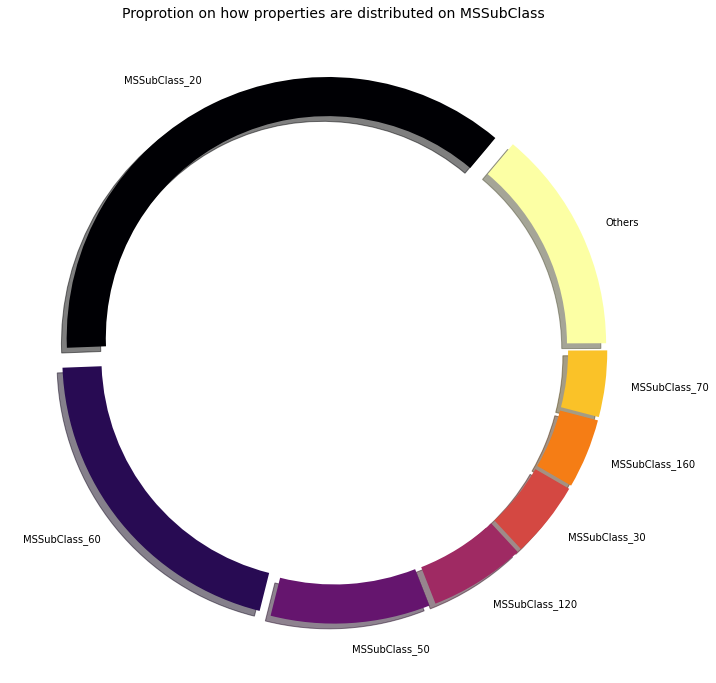

In [194]:
MSSubClass_val = house_prices_viz['MSSubClass'].value_counts()
MSSubClass_val_mean = MSSubClass_val.median()
final_MSSubClass_val = pd.Series(dtype=int)
for val in MSSubClass_val.index:
    if MSSubClass_val[val] > MSSubClass_val_mean:
        final_MSSubClass_val[val] =  MSSubClass_val[val]
final_MSSubClass_val['Others'] = MSSubClass_val.sum() - final_MSSubClass_val.sum()
final_MSSubClass_val.plot.pie(startangle = 50,figsize=(13,12),fontsize=10,explode=tuple(np.zeros(final_MSSubClass_val.size)+0.05),wedgeprops=dict(width=0.15),shadow=True,cmap='inferno')
plt.ylabel('')
plt.title('Proprotion on how properties are distributed on MSSubClass',fontsize=14)
plt.savefig("MSSubClassDistribution.jpeg",bbox_inches='tight')
plt.show()

##### 6.1.2: MSZoning

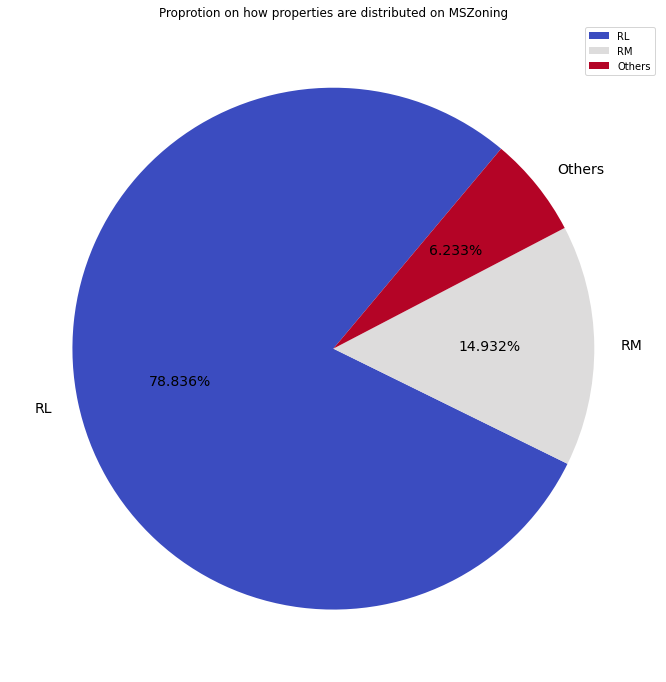

In [195]:
MSZoning_val = house_prices_viz['MSZoning'].value_counts()
MSZoning_val_mean = MSZoning_val.median()
final_MSZoning_val = pd.Series(dtype=float)
for val in MSZoning_val.index:
    if MSZoning_val[val] > MSZoning_val_mean:
        final_MSZoning_val[val] = MSZoning_val[val]
final_MSZoning_val['Others'] = MSZoning_val.sum() - final_MSZoning_val.sum()
final_MSZoning_val.plot.pie(startangle = 50,figsize=(13,12),fontsize=14,autopct="%.3f%%",cmap='coolwarm',legend=True)
plt.ylabel('')
plt.title('Proprotion on how properties are distributed on MSZoning')
plt.savefig("MSZoningDistribution.jpeg",bbox_inches='tight')
plt.show()

##### 6.1.3: Neighbourhood

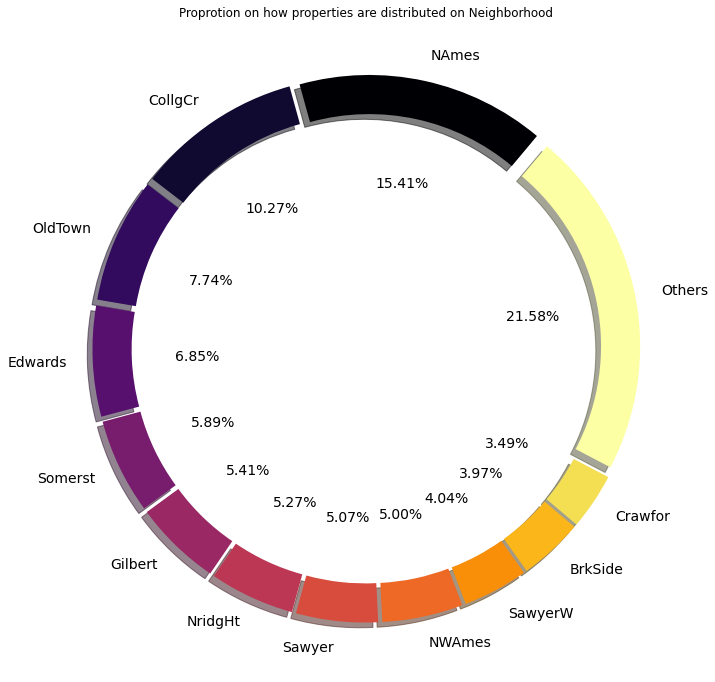

In [196]:
Neighborhood_vals = house_prices_viz['Neighborhood'].value_counts()
Neighborhood_vals_mean = Neighborhood_vals.median()
final_Neighborhood_vals = pd.Series(dtype=float)
for val in Neighborhood_vals.index:
    if Neighborhood_vals[val] > Neighborhood_vals_mean:
        final_Neighborhood_vals[val] = Neighborhood_vals[val]
final_Neighborhood_vals['Others'] = Neighborhood_vals.sum() - final_Neighborhood_vals.sum()
final_Neighborhood_vals.plot.pie(startangle = 50,figsize=(13,12),fontsize=14,autopct="%.2f%%",explode=tuple(np.zeros(final_Neighborhood_vals.size)+0.05),wedgeprops=dict(width=0.15),shadow=True,cmap='inferno')
plt.ylabel('')
plt.title('Proprotion on how properties are distributed on Neighborhood')
plt.savefig("NeighborhoodDistribution.jpeg",bbox_inches='tight')
plt.show()

<a id='BV'></a>
### 6.2: Bivariate Visualization

##### 6.2.1: TotRmsAbvGrd vs GrLivArea

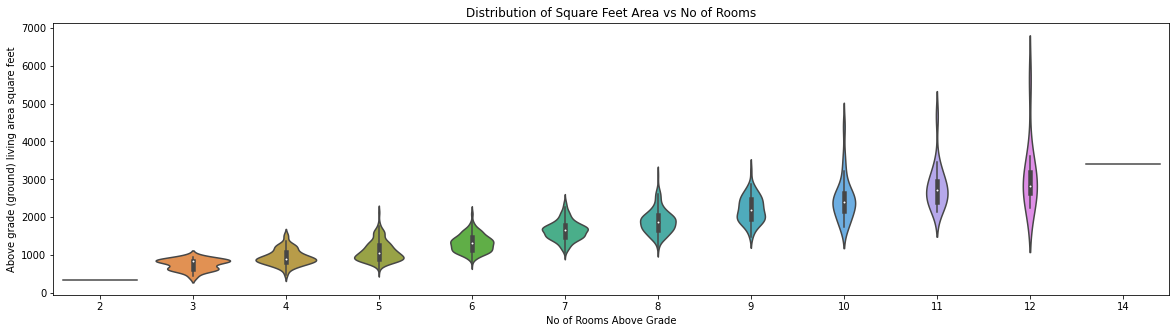

In [197]:
plt.figure(figsize=(20,5))
sns.violinplot(house_prices_viz['TotRmsAbvGrd'],house_prices_viz['GrLivArea'],)
plt.xlabel('No of Rooms Above Grade')
plt.ylabel('Above grade (ground) living area square feet')
plt.title('Distribution of Square Feet Area vs No of Rooms')
plt.savefig('SqFtAreaVsNoOfRooms.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.2: GrLivArea vs SalePrice

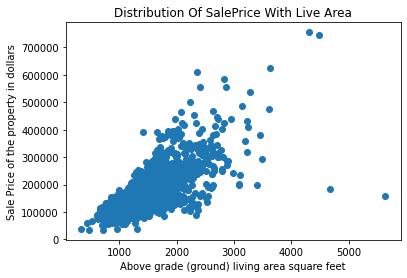

In [198]:
plt.scatter(house_prices_viz['GrLivArea'],house_prices_viz['SalePrice'])
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price of the property in dollars')
plt.title('Distribution Of SalePrice With Live Area')
plt.savefig('LivAreaVsSalePrice.jpeg',bbox_inches='tight')
plt.show()

###### TakeAways
We can see a strong co-relation between the GrLiveArea and SalePrice

##### 6.2.3: Age of the house vs Sale Price of the house

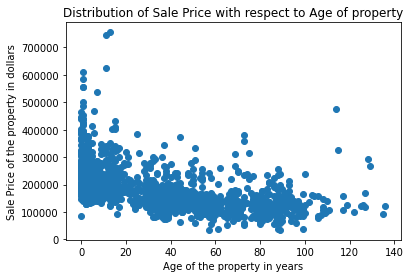

In [199]:
plt.scatter(house_prices_viz['AgeOfProperty'],house_prices_viz['SalePrice'])
plt.xlabel('Age of the property in years')
plt.ylabel('Sale Price of the property in dollars')
plt.title('Distribution of Sale Price with respect to Age of property')
plt.savefig('PropAgeVsNoOfRooms.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.4: Age of re-modeled house vs Sale Price of the house 

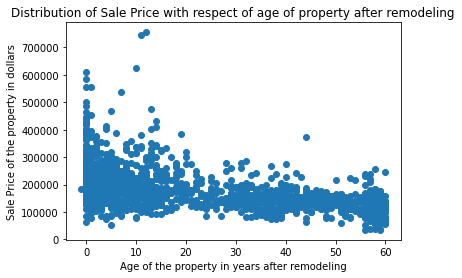

In [200]:
plt.scatter(house_prices_viz['AgeOfPropertyRe'],house_prices_viz['SalePrice'])
plt.xlabel('Age of the property in years after remodeling')
plt.ylabel('Sale Price of the property in dollars')
plt.title('Distribution of Sale Price with respect of age of property after remodeling')
plt.savefig('ReAgeAreaVsNoOfRooms.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.5: Age of garage house vs Sale Price of the house 

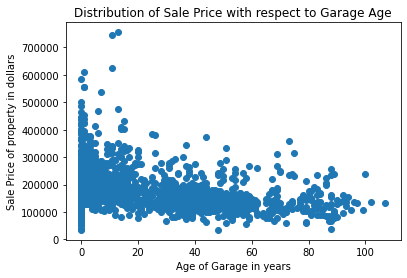

In [201]:
plt.scatter(house_prices_viz['AgeOfGarage'],house_prices_viz['SalePrice'])
plt.xlabel('Age of Garage in years')
plt.ylabel('Sale Price of property in dollars')
plt.title('Distribution of Sale Price with respect to Garage Age')
plt.savefig('GrAgeVsNoOfRooms.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.6: Does garage area affect the sale price?

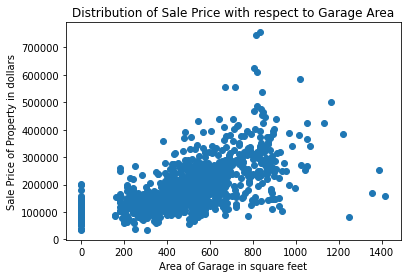

In [202]:
plt.scatter(house_prices_viz['GarageArea'],house_prices_viz['SalePrice'])
plt.xlabel('Area of Garage in square feet')
plt.ylabel('Sale Price of Property in dollars')
plt.title('Distribution of Sale Price with respect to Garage Area')
plt.savefig('SalePriceVsNoOfRooms.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.7: No of Cars in Garage Vs Garage Areas

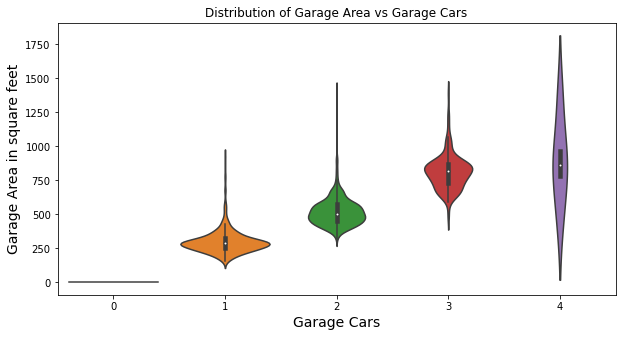

In [203]:
plt.figure(figsize=(10,5))
sns.violinplot(house_prices_viz['GarageCars'],house_prices_viz['GarageArea'])
plt.xlabel('Garage Cars',fontsize=14)
plt.ylabel('Garage Area in square feet',fontsize=14)
plt.title("Distribution of Garage Area vs Garage Cars")
plt.savefig('GarageCarsVsGarageArea.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.8: Does No of Rooms affect the sale price?

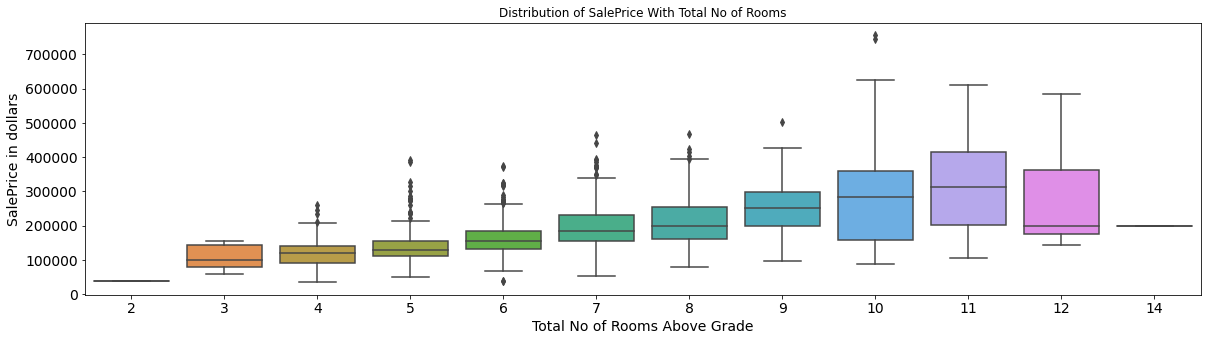

In [204]:
plt.figure(figsize=(20,5))
sns.boxplot(house_prices_viz['TotRmsAbvGrd'],house_prices_viz['SalePrice'])
plt.xlabel('Total No of Rooms Above Grade',fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('SalePrice in dollars',fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Distribution of SalePrice With Total No of Rooms')
plt.savefig('NoOfRoomsVsSalePrice.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.9: Does House Style affect the sale price?

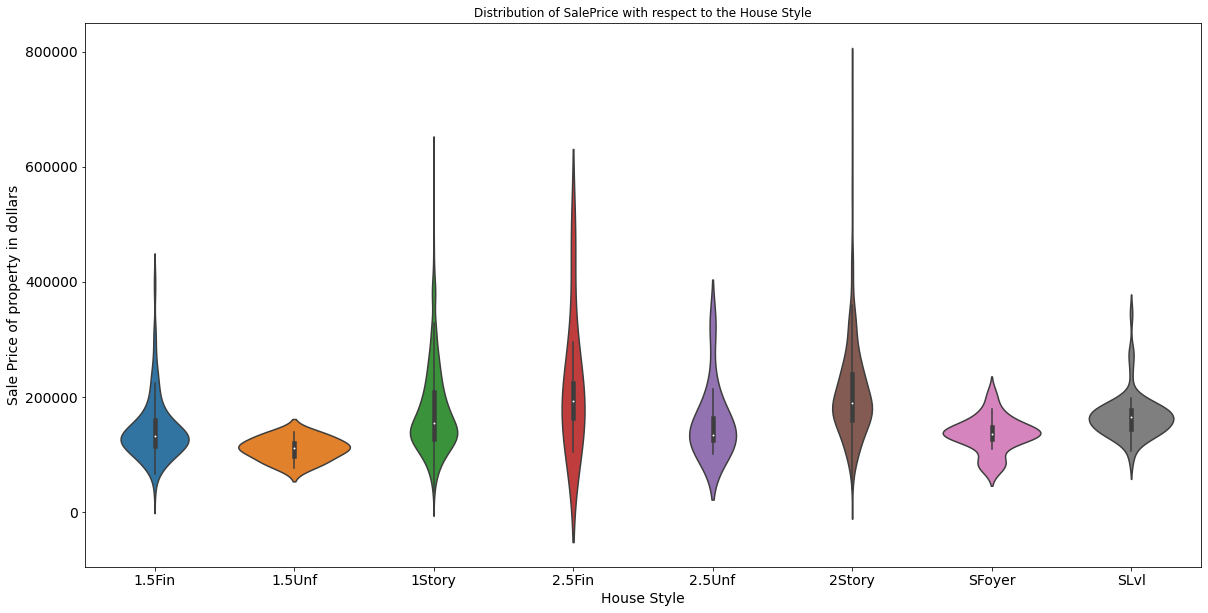

In [205]:
plt.figure(figsize=(20,10))
sns.violinplot(house_prices_viz['HouseStyle'],house_prices_viz['SalePrice'],)
plt.xlabel('House Style',fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Sale Price of property in dollars',fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Distribution of SalePrice with respect to the House Style')
plt.savefig('houseStyleVsSalePrice.jpeg',bbox_inches='tight')
plt.show()

##### 6.2.10: Distribution of sale price year wise

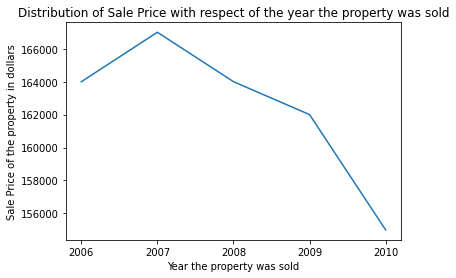

In [206]:
yrSoleMedian = house_prices_viz.groupby('YrSold')['SalePrice'].median().plot(kind='line',fontsize=10)
plt.xticks(np.arange(2006,2011,1))
plt.xlabel('Year the property was sold',fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Sale Price of the property in dollars',fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Sale Price with respect of the year the property was sold')
plt.savefig('SalePriceVsYrSold.jpeg',bbox_inches='tight')
plt.show()

###### Takeaway
We can see a steep drop in sale price after 2008

##### 6.2.11: Pie Chart Showing how building types are distributed accross house styles

In [207]:
groupByneighbourhood = house_prices_viz[['HouseStyle','BldgType']].groupby('HouseStyle')

outer_labels = groupByneighbourhood['BldgType'].agg('count').index.tolist()
outer_color_dict = {'1.5Fin':'lightcoral', '1.5Unf':'indianred', '1Story':'firebrick', '2.5Fin':'darkred', '2.5Unf':'salmon', '2Story':'red', 'SFoyer':'mistyrose','SLvl':'maroon'}
outer_colors = [outer_color_dict[label] for label in outer_labels]
outer_values = groupByneighbourhood['BldgType'].agg('count').values.tolist()
inner_labels = groupByneighbourhood['BldgType'].value_counts().index.get_level_values('BldgType').tolist()
inner_color_dict = {'TwnhsE':'royalblue', '1Fam':'cornflowerblue', 'Twnhs':'purple', 'Duplex':'mediumpurple', '2fmCon':'blue'}
inner_colors = [inner_color_dict[label] for label in inner_labels]
inner_values = groupByneighbourhood['BldgType'].value_counts().values.tolist()
pd.set_option('display.max_rows', None)

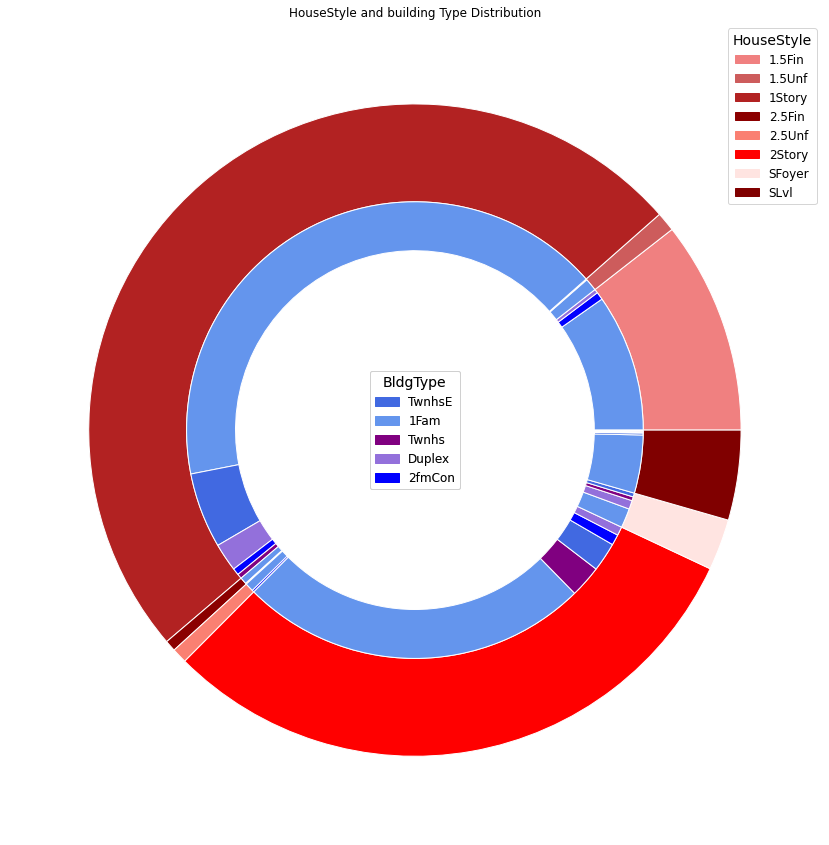

In [208]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(outer_values,wedgeprops=dict(width=0.3,edgecolor='w'),radius=1,colors=outer_colors)
ax.pie(inner_values,wedgeprops=dict(width=0.15,edgecolor='w'),radius=1-0.3,colors=inner_colors)
plt.title('HouseStyle and building Type Distribution')

outer_patches = [mpatches.Patch(color = outer_color_dict[label], label = label) for label in outer_color_dict.keys()] 
inner_patches = [mpatches.Patch(color = inner_color_dict[label], label = label) for label in inner_color_dict.keys()]
legend = plt.legend(handles=outer_patches,title='HouseStyle',fontsize=12,title_fontsize=14)
ax.add_artist(legend)
legend1 = plt.legend(handles=inner_patches,title='BldgType',loc ='center',fontsize=12,title_fontsize=14)
ax.add_artist(legend1)
plt.savefig('housestyleBldgType.jpeg',bbox_inches='tight')
plt.show()

<a id='MV'></a>
### 6.3: Multi - variate Visualization

##### 6.3.1: Distribution of sale price in different neighborhoods differentiated by MSZoning

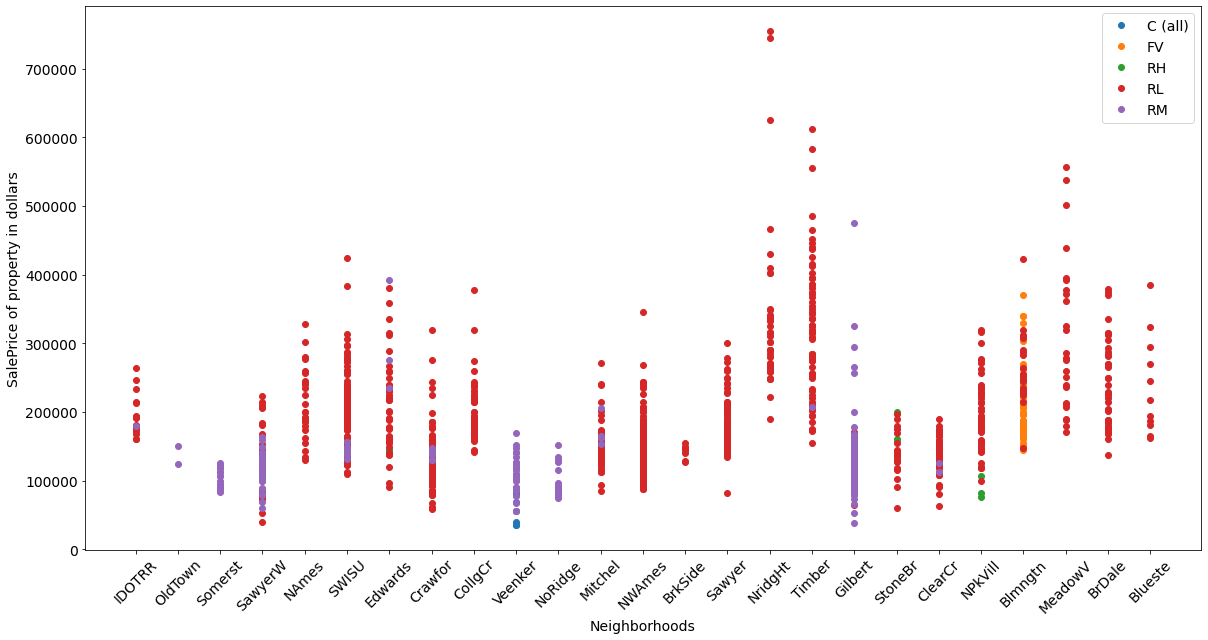

In [209]:
grpByMSZoning = house_prices_viz.groupby('MSZoning')
plt.figure(figsize=(20,10))
for name, group in grpByMSZoning:
    plt.plot(group["Neighborhood"], group["SalePrice"], marker="o", linestyle="", label=name)
plt.xticks(rotation = 45,fontsize=14)
plt.xlabel('Neighborhoods',fontsize=14)
plt.ylabel('SalePrice of property in dollars',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('SalePriceVsNeighborhoodMSZoning.jpeg',bbox_inches='tight')
plt.show()

##### 6.3.2: Distribution of sale price in different neighborhoods differentiated by HouseStyles

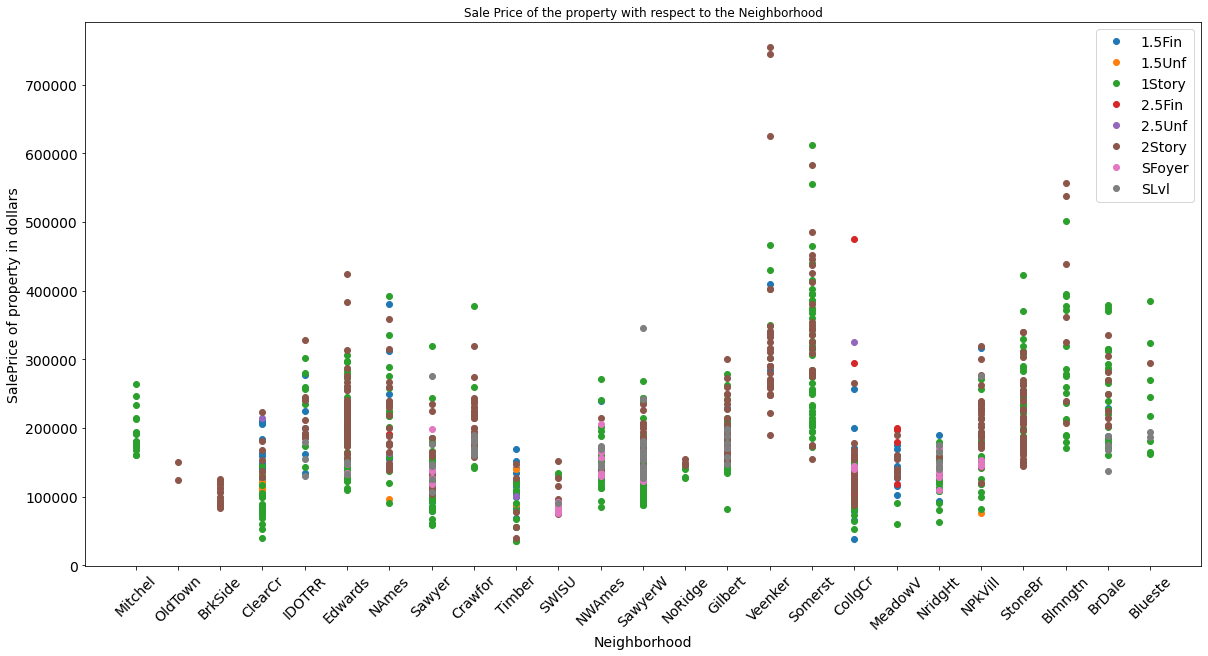

In [210]:
grpByHouseStyle = house_prices_viz.groupby('HouseStyle')
plt.figure(figsize=(20,10))
for name, group in grpByHouseStyle:
    plt.plot(group["Neighborhood"], group["SalePrice"], marker="o", linestyle="", label=name)
plt.xticks(rotation = 45,fontsize=14)
plt.xlabel('Neighborhood',fontsize=14)
plt.ylabel('SalePrice of property in dollars',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('Sale Price of the property with respect to the Neighborhood')
plt.savefig('SalePriceVsNeighborhoodHouseStyle.jpeg',bbox_inches='tight')
plt.show()

<a id='splitting'></a>
## 7: Splitting the data

<a id='declaring'></a>
### 7.1: Declaring features and target

In [211]:
house_prices.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'SalePrice', 'MSSubClass_Values',
       'MSZoning_Values', 'Street_Pave', 'LotShape_Values',
       'LandContour_Values', 'Utilities_NoSeWa', 'LotConfig_Values',
       'LandSlope_Values', 'Neighborhood_Values', 'Condition1_Values',
       'Condition2_Values', 'BldgType_Values', 'HouseStyle_Values',
       'AgeOfProperty', 'AgeOfPropertyRe', 'RoofStyle_Values',
     

In [212]:
features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MSSubClass_Values',
       'MSZoning_Values', 'Street_Pave', 'LotShape_Values',
       'LandContour_Values', 'Utilities_NoSeWa', 'LotConfig_Values',
       'LandSlope_Values', 'Neighborhood_Values', 'Condition1_Values',
       'Condition2_Values', 'BldgType_Values', 'HouseStyle_Values',
       'AgeOfProperty', 'AgeOfPropertyRe', 'RoofStyle_Values',
       'RoofMatl_Values', 'Exterior1st_Values', 'Exterior2nd_Values',
       'MasVnrType_Values', 'Foundation_Values', 'BsmtExposure_Values',
       'BsmtFinType1_Values', 'BsmtFinType2_Values', 'Heating_Values',
       'Electrical_Values', 'Functional_Values', 'GarageType_Values',
       'AgeOfGarage', 'GarageFinish_Values', 'PavedDrive_Values',
       'MiscFeature_Values', 'YrSold_Values', 'SaleType_Values',
       'SaleCondition_Values']

In [213]:
target = 'SalePrice'

In [214]:
x = house_prices[features]

In [215]:
y = house_prices[target]

<a id='trainAndtest'></a>
### 7.2: Splitting the data in train and test

In [216]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=1)

<a id='linearRegression'></a>
## 8: Linear Regression

In [217]:
x_train_lr = x_train
x_test_lr = x_test
y_train_lr = y_train
y_test_lr = y_test

<a id='assumptions'></a>
### 8.1: Checking Pre-Requisites

#### 8.1.1 The target variable must be normally distributed

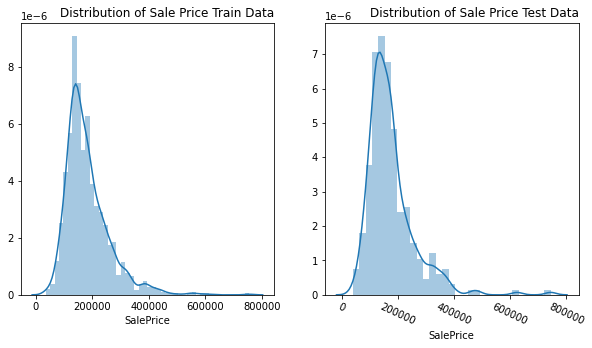

In [218]:
f, ax = plt.subplots(1,2,figsize=(10,5))

sns.distplot(y_train_lr,ax=ax[0])
plt.xticks(rotation=-25)
ax[0].set_title('Distribution of Sale Price Train Data', loc='right')
sns.distplot(y_test_lr,ax=ax[1])
plt.xticks(rotation=-25)
ax[1].set_title('Distribution of Sale Price Test Data', loc='right')
plt.savefig('DistributionOfSalePrice.jpeg',bbox_inches='tight')
plt.show()

In [219]:
y_train_lr.describe()

count      1168.000000
mean     182208.341610
std       78086.084388
min       34900.000000
25%      131000.000000
50%      164945.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [220]:
y_test_lr.describe()

count       292.000000
mean     175772.613014
std       84595.814158
min       40000.000000
25%      124000.000000
50%      158250.000000
75%      200625.000000
max      745000.000000
Name: SalePrice, dtype: float64

###### Takeaway
- As evident by the histogram and the mean being faraway from the median for the saleprice feature, we can conclude that Sale Price is not normally distributed.
- We will transform the Sale Price with log to make it normally distributed

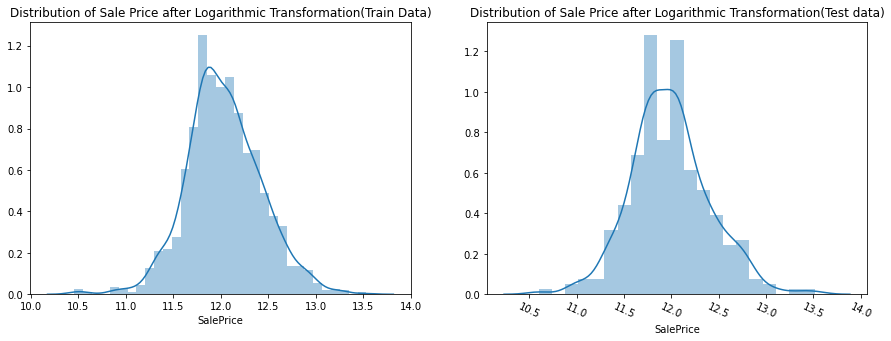

In [221]:
y_train_log = np.log(y_train_lr)
y_test_log = np.log(y_test_lr)
house_prices_viz = house_prices_viz.join(np.log(house_prices_viz['SalePrice']).rename('SalePrice_log'))
house_prices = house_prices.join(np.log(house_prices['SalePrice']).rename('SalePrice_log'))
f, ax = plt.subplots(1,2,figsize=(15,5))

sns.distplot(y_train_log,ax=ax[0])
plt.xticks(rotation=-25)
ax[0].title.set_text('Distribution of Sale Price after Logarithmic Transformation(Train Data)')
sns.distplot(y_test_log,ax=ax[1])
plt.xticks(rotation=-25)
ax[1].title.set_text('Distribution of Sale Price after Logarithmic Transformation(Test data)')
plt.savefig('DistributionOfSalePrice_trans.jpeg',bbox_inches='tight')
plt.show()


In [222]:
y_train_log.describe()

count    1168.000000
mean       12.033654
std         0.394460
min        10.460242
25%        11.782953
50%        12.013367
75%        12.278393
max        13.534473
Name: SalePrice, dtype: float64

In [223]:
y_test_log.describe()

count    292.000000
mean      11.985639
std        0.417315
min       10.596635
25%       11.728037
50%       11.971930
75%       12.209192
max       13.521139
Name: SalePrice, dtype: float64

#### 8.1.2 There should be a linear relationship between the Target varianble and the explanatory Variables

In [224]:
house_prices.columns.shape

(78,)

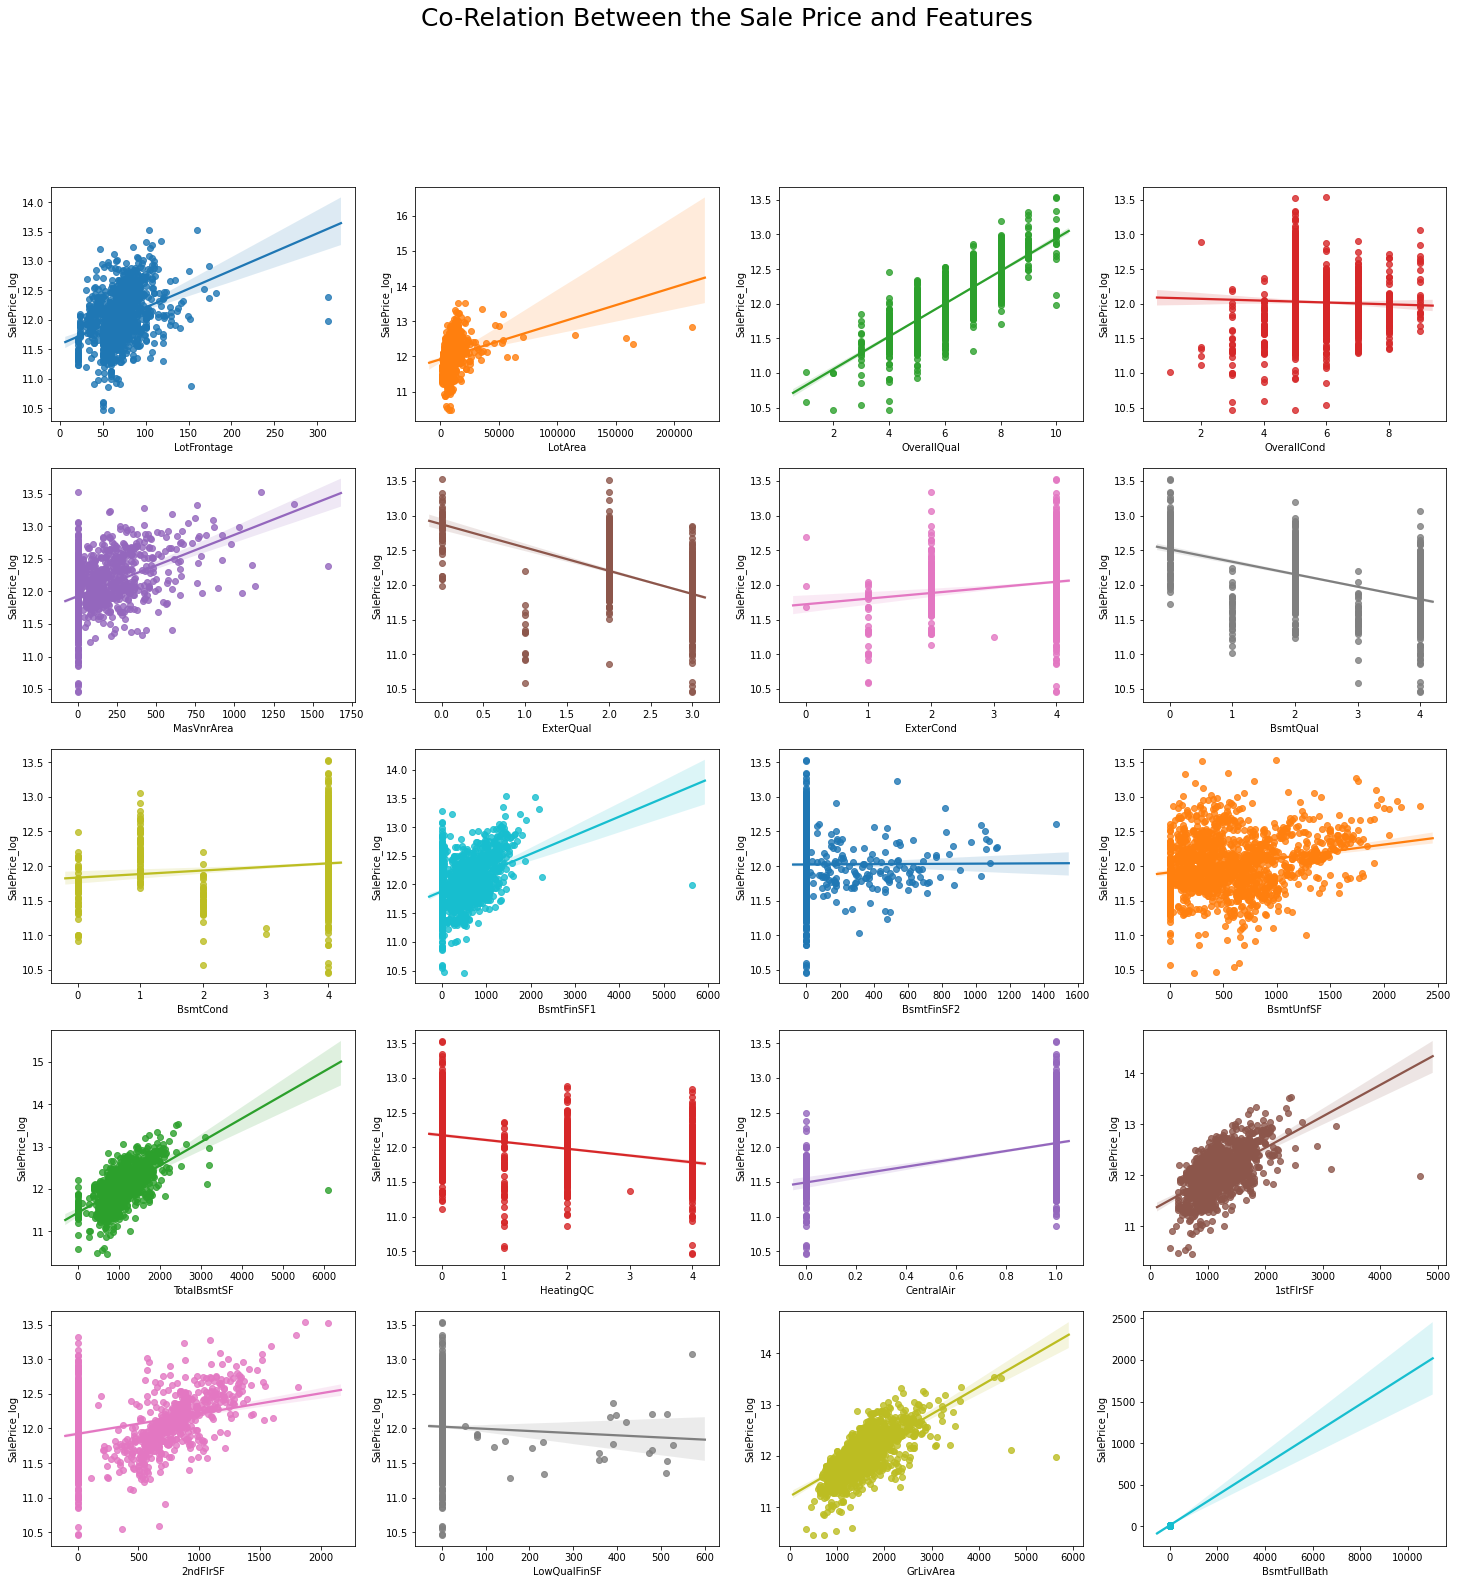

In [225]:
f,axs = plt.subplots(5,4,figsize = (25,25))
f.suptitle('Co-Relation Between the Sale Price and Features',fontsize =25)
for i in np.arange(0,20,1,dtype=int):
    sns.regplot(house_prices.columns[i],'SalePrice_log',data=house_prices,ax=axs[int(i/4)][i%4])
plt.savefig('CorrSalePriceAndFeatures1.jpeg',bbox_inches='tight')
plt.show()
#sns.jointplot('GrLivArea', 'SalePrice_log', data=house_prices, kind='reg')

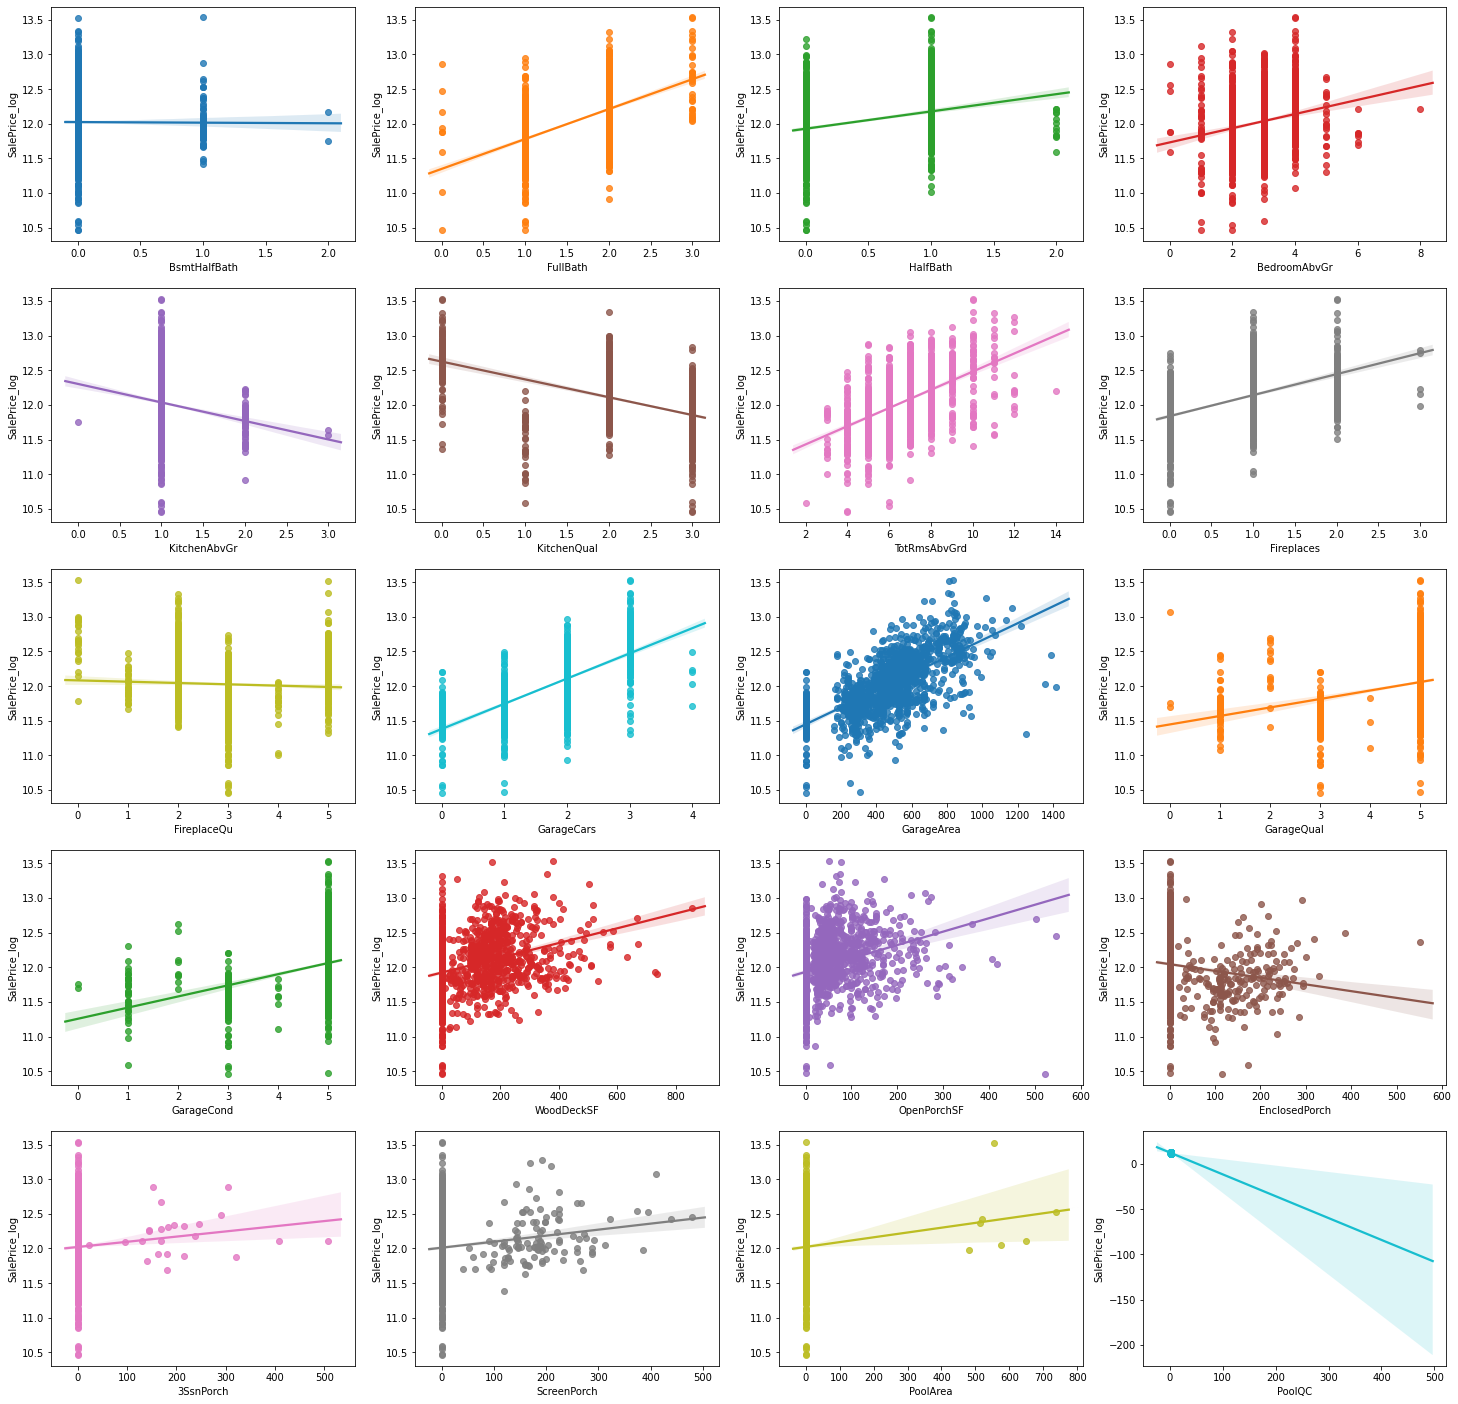

In [226]:
f,axs = plt.subplots(5,4,figsize = (25,25))
for i in np.arange(20,40,1,dtype=int):
    sns.regplot(house_prices.columns[i],'SalePrice_log',data=house_prices,ax=axs[int((i-20)/4)][i%4])
plt.savefig('CorrSalePriceAndFeatures2.jpeg',bbox_inches='tight')
plt.show()

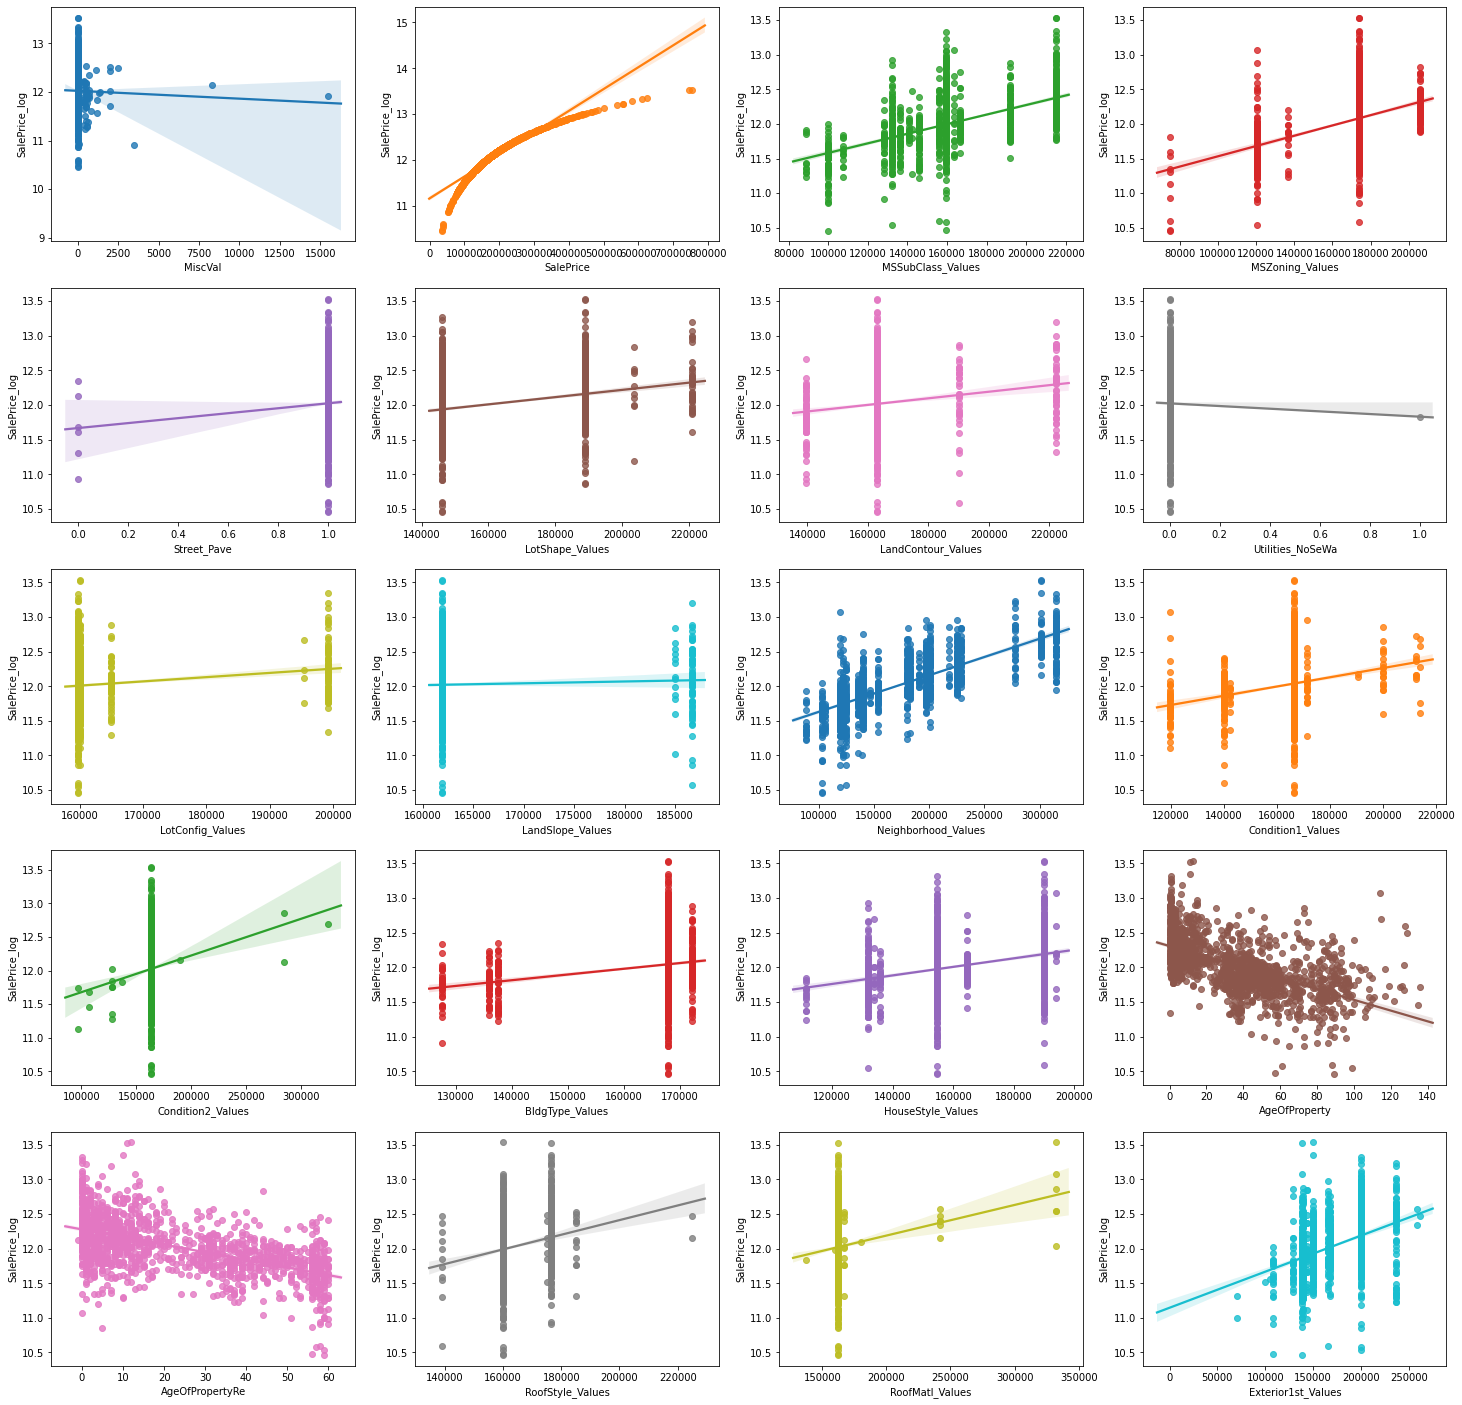

In [227]:
f,axs = plt.subplots(5,4,figsize = (25,25))
for i in np.arange(40,60,1,dtype=int):
    sns.regplot(house_prices.columns[i],'SalePrice_log',data=house_prices,ax=axs[int((i-40)/4)][i%4])
plt.savefig('CorrSalePriceAndFeatures3.jpeg',bbox_inches='tight')
plt.show()

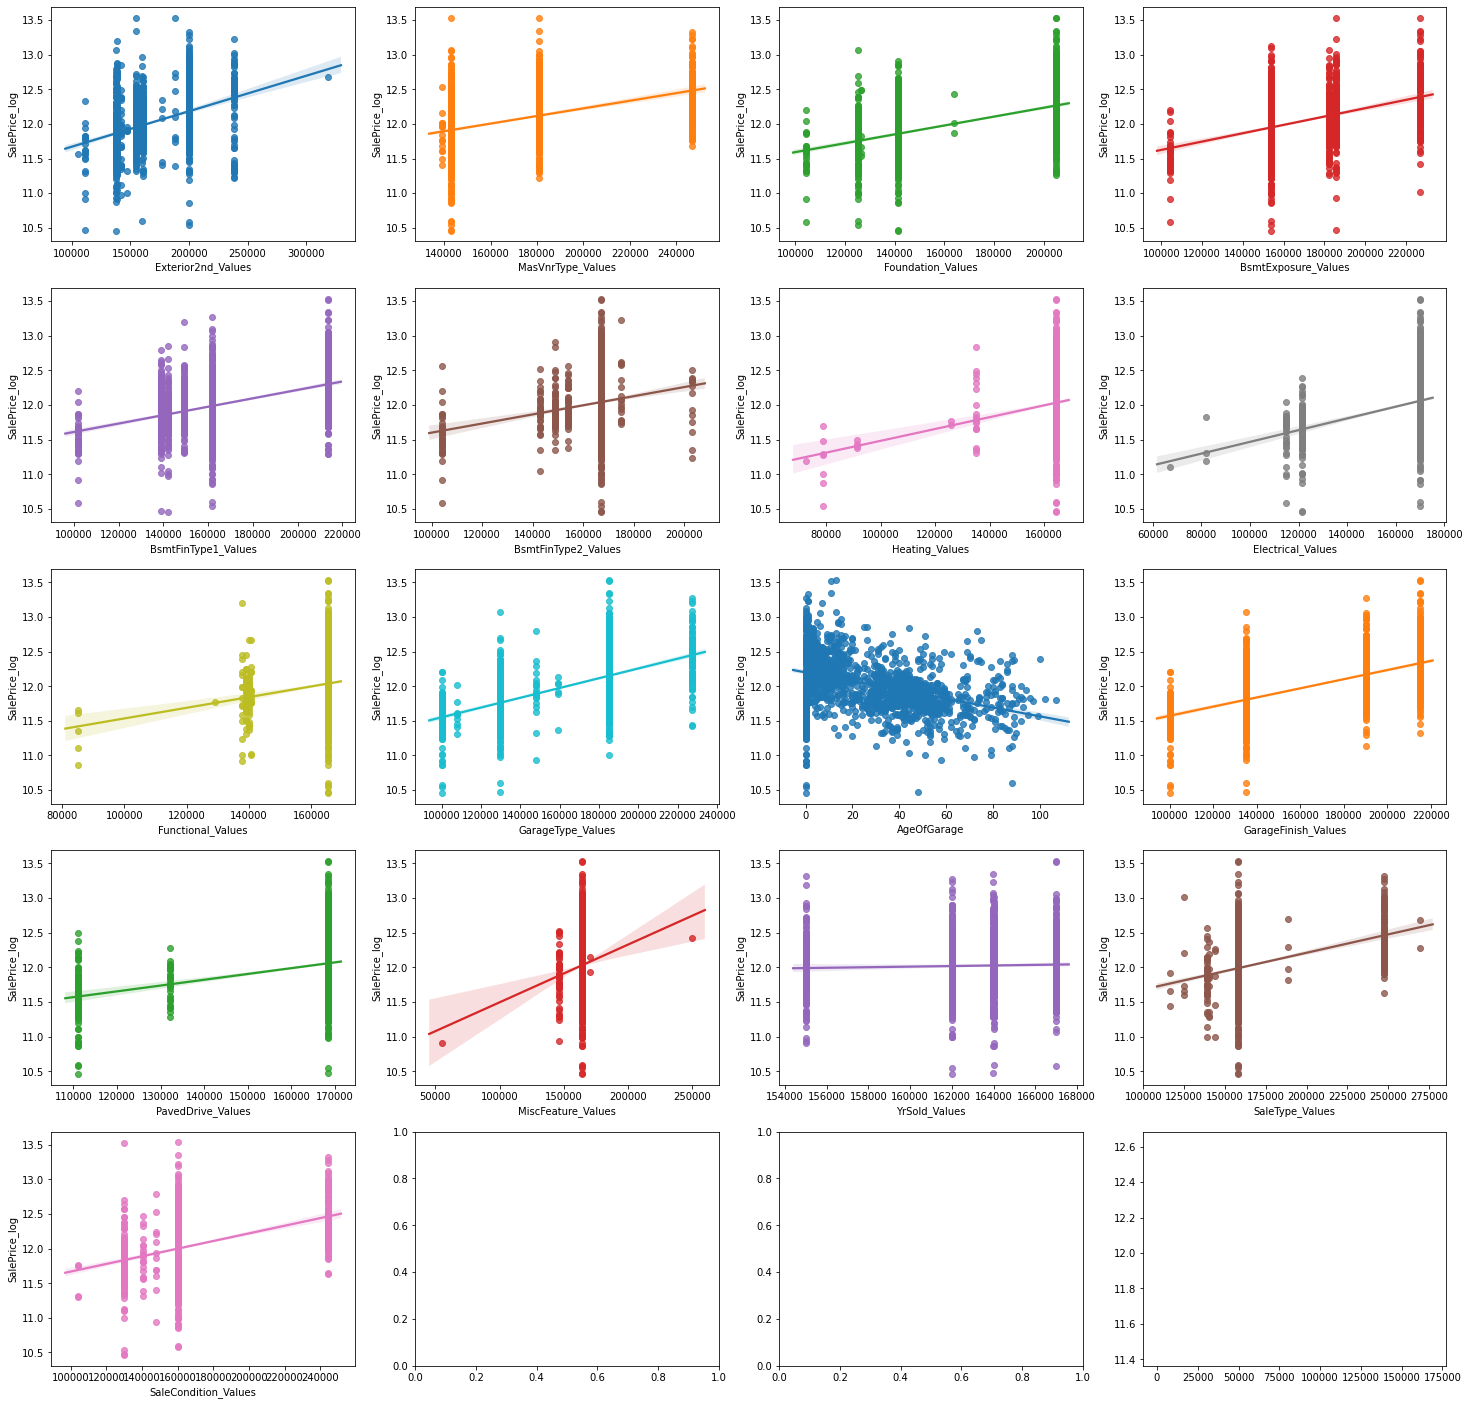

In [228]:
f,axs = plt.subplots(5,4,figsize = (25,25))
for i in np.arange(60,77,1,dtype=int):
    if i < house_prices.columns.shape[0]:
        sns.regplot(house_prices.columns[i],'SalePrice_log',data=house_prices,ax=axs[int((i-60)/4)][i%4])
plt.savefig('CorrSalePriceAndFeatures4.jpeg',bbox_inches='tight')
plt.show()

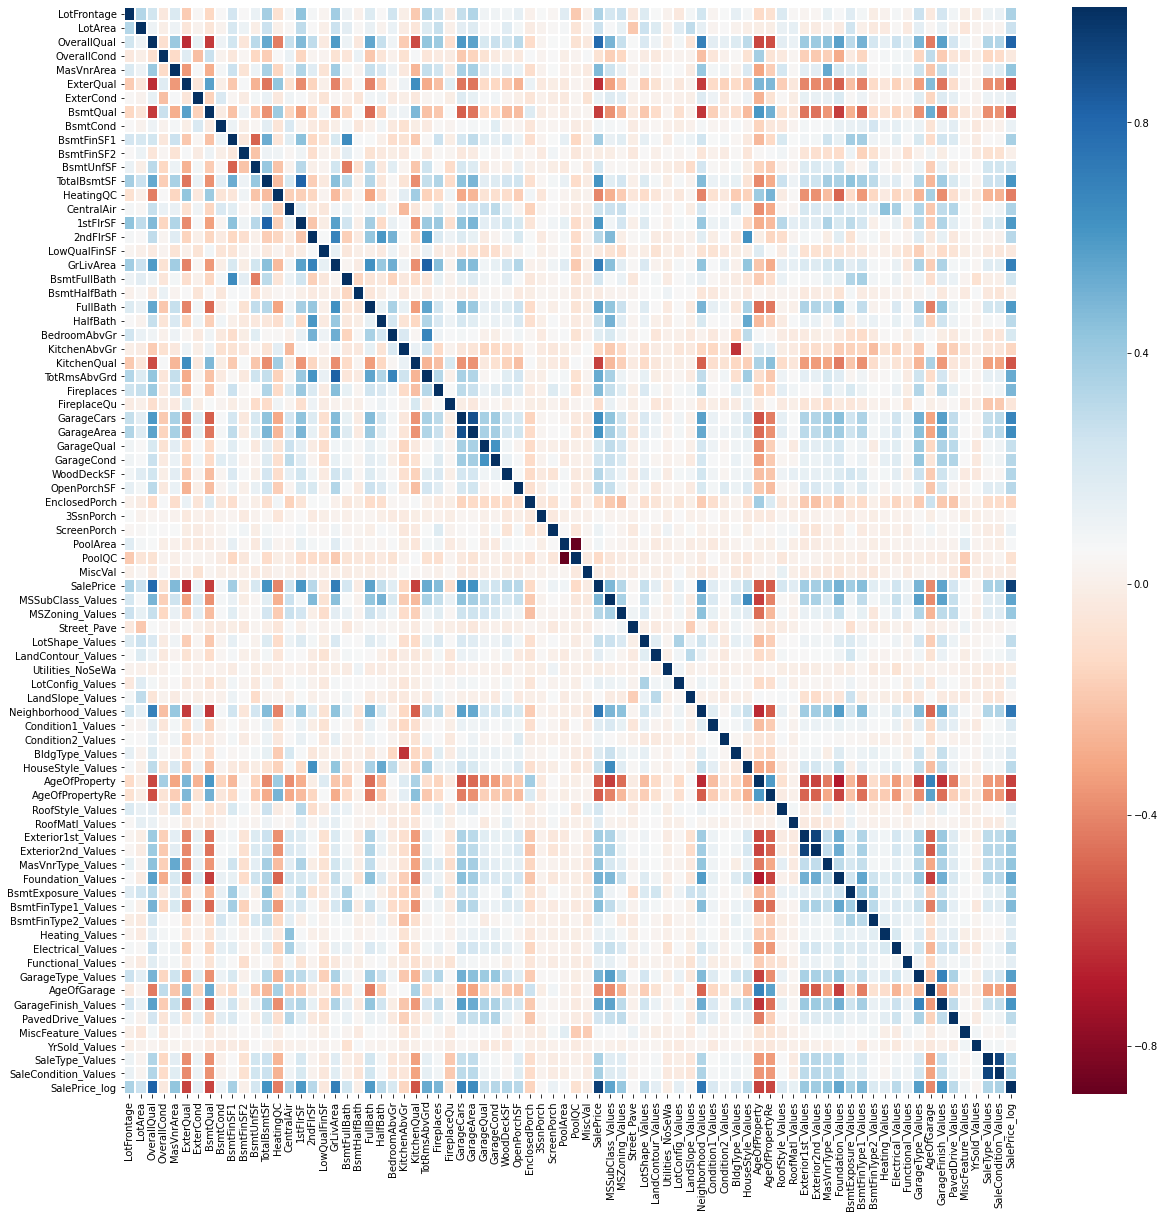

In [229]:
plt.figure(figsize=(20,20))
sns.heatmap(house_prices.corr(),cmap='RdBu',linewidths=1)
plt.savefig('CorrHeatMap1.jpeg',bbox_inches='tight')
plt.show()

In [230]:
pd.set_option('display.max_rows', 77)
house_prices_lowCorr_with_target = house_prices.corr().round(2)[(house_prices.corr().round(2)['SalePrice_log'] < 0.2) & (house_prices.corr().round(2)['SalePrice_log'] > -0.2)]['SalePrice_log']
house_prices_lowCorr_with_target

OverallCond           -0.04
ExterCond              0.15
BsmtCond               0.12
BsmtFinSF2             0.00
LowQualFinSF          -0.04
BsmtHalfBath          -0.01
KitchenAbvGr          -0.15
FireplaceQu           -0.06
EnclosedPorch         -0.15
3SsnPorch              0.05
ScreenPorch            0.12
PoolArea               0.07
PoolQC                -0.09
MiscVal               -0.02
Street_Pave            0.06
LandContour_Values     0.15
Utilities_NoSeWa      -0.01
LotConfig_Values       0.15
LandSlope_Values       0.04
Condition2_Values      0.10
RoofMatl_Values        0.13
BsmtFinType2_Values    0.19
Heating_Values         0.17
Functional_Values      0.15
MiscFeature_Values     0.10
YrSold_Values          0.04
Name: SalePrice_log, dtype: float64

In [231]:
pd.reset_option('display.max_rows')

The Corr of the following columns with SalePrice_log is very low: (either < 0.2 or > -0.2)
- OverAllCond is -0.04
- ExterCond is 0.15
- BsmtCond is 0.12
- BsmtFinSF2 is 0.0
- LowQualFinSF is -0.04
- BsmtHalfBath is -0.01
- KitchenAbvGr is -0.15
- FireplaceQu is -0.06
- EnclosedPorch is -0.15
- 3SsnPorch is 0.05
- ScreenPorch is 0.12
- PoolArea is 0.07
- PoolQC is -0.09
- MiscVal is -0.02
- YrSold is -0.04 
- Street_Pave is 0.06
- LandContour_Values is 0.15
- Utilities_NoSeWa is -0.01
- LotConfig_Values is 0.15
- LandSlope_Values is 0.04
- Condition2_Values is 0.10
- RoofMatl_Values is 0.13
- BsmtFinType2_Values is 0.19
- Heating_Values is 0.17
- Functional_Values is 0.15
- MiscFeature_Values is 0.10

Therefore, these can be dropped

In [232]:
x_train_lr = x_train.drop(house_prices_lowCorr_with_target.index,axis=1)
x_test_lr = x_test.drop(house_prices_lowCorr_with_target.index,axis=1)

#### 8.1.3 The Explanatory Variables should not be co-related to each other

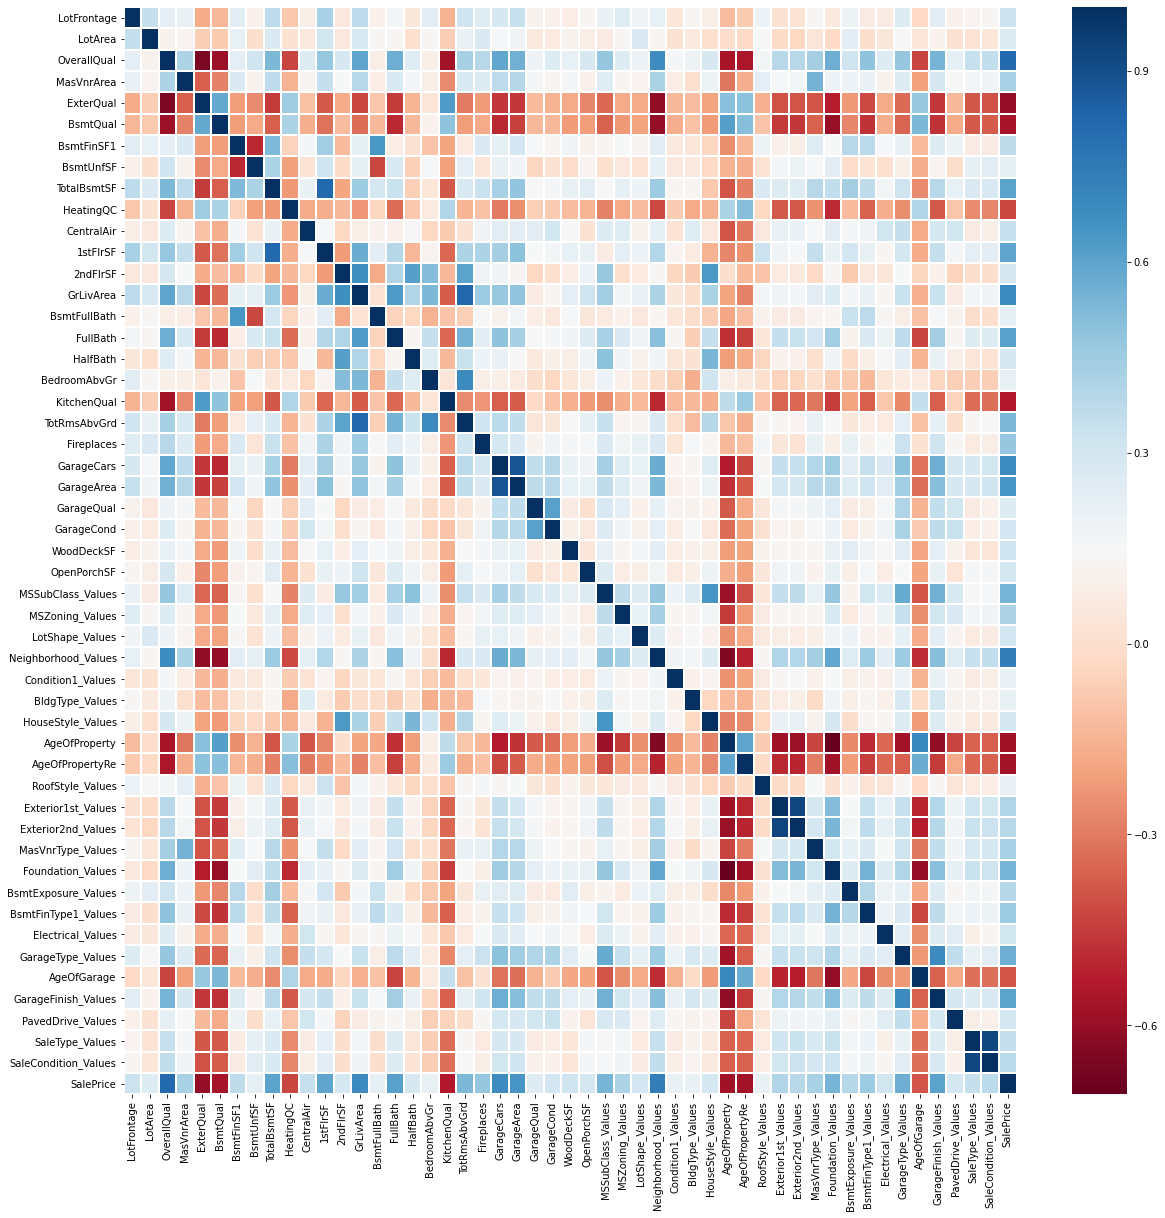

In [233]:
house_prices_corr = x_train_lr.join(y_train_log)
plt.figure(figsize=(20,20))
sns.heatmap(house_prices_corr.corr(),cmap='RdBu',linewidths=1)
plt.savefig('CorrHeatMap2.jpeg',bbox_inches='tight')
plt.show()

In [234]:
house_price_corr = house_prices.corr().round(2)
house_price_corr

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_Values,MSZoning_Values,Street_Pave,LotShape_Values,LandContour_Values,Utilities_NoSeWa,LotConfig_Values,LandSlope_Values,Neighborhood_Values,Condition1_Values,Condition2_Values,BldgType_Values,HouseStyle_Values,AgeOfProperty,AgeOfPropertyRe,RoofStyle_Values,RoofMatl_Values,Exterior1st_Values,Exterior2nd_Values,MasVnrType_Values,Foundation_Values,BsmtExposure_Values,BsmtFinType1_Values,BsmtFinType2_Values,Heating_Values,Electrical_Values,Functional_Values,GarageType_Values,AgeOfGarage,GarageFinish_Values,PavedDrive_Values,MiscFeature_Values,YrSold_Values,SaleType_Values,SaleCondition_Values,SalePrice_log
LotFrontage,1.00,0.34,0.24,-0.04,0.20,-0.18,0.04,-0.14,0.05,0.23,0.05,0.12,0.38,-0.09,0.08,0.43,0.08,0.03,0.39,0.11,0.01,0.19,0.05,0.25,-0.01,-0.19,0.33,0.25,-0.02,0.28,0.34,0.10,0.10,0.09,0.14,0.01,0.06,0.04,0.17,-0.19,0.01,0.35,0.22,0.26,-0.04,0.19,0.06,0.02,-0.04,0.09,0.24,0.03,0.06,0.14,0.08,-0.12,-0.08,0.19,0.05,0.03,0.04,0.13,0.07,0.17,0.09,-0.01,0.02,0.07,0.02,0.26,-0.03,0.23,0.09,-0.00,-0.00,0.11,0.12,0.35
LotArea,0.34,1.00,0.11,-0.01,0.10,-0.06,0.02,-0.06,0.02,0.21,0.11,-0.00,0.26,0.00,0.05,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,-0.06,0.19,0.27,0.01,0.15,0.18,0.05,0.07,0.17,0.08,-0.02,0.02,0.04,0.08,-0.07,0.04,0.26,0.07,0.13,-0.20,0.26,0.19,0.01,0.18,0.30,0.14,0.02,0.05,0.02,-0.00,-0.01,-0.01,0.13,0.15,-0.01,-0.02,0.03,-0.02,0.24,0.00,-0.03,-0.03,0.05,-0.03,0.15,0.04,0.12,0.01,-0.06,0.02,0.02,0.03,0.26
OverallQual,0.24,0.11,1.00,-0.09,0.41,-0.63,0.14,-0.60,0.11,0.24,-0.06,0.31,0.54,-0.43,0.27,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,-0.56,0.43,0.40,-0.10,0.60,0.56,0.21,0.27,0.24,0.31,-0.11,0.03,0.06,0.07,-0.08,-0.03,0.79,0.50,0.28,0.06,0.20,0.10,-0.00,0.08,-0.06,0.69,0.16,0.14,0.19,0.30,-0.57,-0.55,0.16,0.12,0.40,0.40,0.44,0.57,0.31,0.50,0.23,0.14,0.26,0.16,0.50,-0.43,0.57,0.23,0.09,0.03,0.34,0.34,0.82
OverallCond,-0.04,-0.01,-0.09,1.00,-0.13,0.17,-0.23,0.27,0.02,-0.05,0.04,-0.14,-0.17,0.05,0.12,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,0.07,-0.06,-0.02,-0.02,-0.19,-0.15,-0.08,-0.02,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.02,0.07,-0.08,-0.16,-0.14,0.04,-0.02,-0.04,0.01,0.01,0.02,-0.23,-0.05,0.01,0.05,-0.08,0.38,-0.07,-0.03,0.03,-0.17,-0.19,-0.17,-0.29,-0.03,-0.14,0.05,0.08,0.08,0.10,-0.14,0.30,-0.18,-0.07,-0.05,-0.01,-0.14,-0.12,-0.04
MasVnrArea,0.20,0.10,0.41,-0.13,1.00,-0.35,0.07,-0.29,0.08,0.26,-0.07,0.11,0.36,-0.14,0.13,0.34,0.17,-0.07,0.39,0.08,0.03,0.27,0.20,0.10,-0.04,-0.26,0.28,0.25,-0.03,0.36,0.37,0.15,0.12,0.16,0.12,-0.11,0.02,0.06,0.01,-0.00,-0.03,0.47,0.25,0.13,0.02,0.10,0.03,0.06,0.05,-0.02,0.42,0.08,0.10,0.01,0.20,-0.31,-0.18,0.22,0.05,0.15,0.16,0.54,0.21,0.18,0.21,0.05,0.06,0.11,0.08,0.25,-0.20,0.28,0.15,0.04,0.04,0.16,0.16,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscFeature_Values,-0.00,-0.06,0.09,-0.05,0.04,0.02,0.05,-0.05,0.03,0.03,0.05,0.04,0.09,0.01,0.06,0.07,0.03,-0.01,0.08,0.02,-0.02,0.06,0.06,0.03,-0.06,-0.02,0.07,0.04,-0.03,0.07,0.06,0.07,0.06,-0.03,0.02,-0.02,-0.01,0.08,0.17,-0.18,-0.18,0.08,0.07,0.05,0.11,0.02,-0.01,0.00,0.02,-0.03,0.07,0.01,0.02,0.06,0.03,-0.08,-0.08,-0.02,0.01,0.03,0.06,0.06,0.08,0.05,0.06,0.08,-0.01,-0.02,0.10,0.06,-0.02,0.05,0.05,1.00,0.09,0.04,0.03,0.10
YrSold_Values,-0.00,0.02,0.03,-0.01,0.04,0.01,0.03,-0.

In [235]:
for i in house_price_corr.index:
    for col in house_price_corr.columns:
        if (house_price_corr.loc[i][col] > 0.8 or house_price_corr.loc[i][col] < -0.8):
            if (i != col and (i not in ['SalePrice','SalePrice_log'] and col not in ['SalePrice','SalePrice_log'])):
                print("{} -> {} = {}".format(i,col,house_price_corr.loc[i][col]))

TotalBsmtSF -> 1stFlrSF = 0.82
1stFlrSF -> TotalBsmtSF = 0.82
GrLivArea -> TotRmsAbvGrd = 0.83
TotRmsAbvGrd -> GrLivArea = 0.83
GarageCars -> GarageArea = 0.88
GarageArea -> GarageCars = 0.88
PoolArea -> PoolQC = -0.88
PoolQC -> PoolArea = -0.88
Exterior1st_Values -> Exterior2nd_Values = 0.93
Exterior2nd_Values -> Exterior1st_Values = 0.93
SaleType_Values -> SaleCondition_Values = 0.92
SaleCondition_Values -> SaleType_Values = 0.92


The Corr of the following columns with Each Other is very high: (either > 0.8 or < -0.8)
- TotalBsmtSF with 1stFlrSF is 0.82
- GrLivArea with TotRmsAbvGrd is 0.83
- GarageCars with GarageArea is 0.88
- PoolArea with PoolQc 0s -0.88
- Exterior1st_Values with Exterior2nd_Values is 0.93
- SaleType_Values with SaleCondition_Values is 0.92

In [236]:
house_price_corr.loc[['TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd','GarageCars','GarageArea','Exterior1st_Values','Exterior2nd_Values','SaleType_Values','SaleCondition_Values']][['SalePrice','SalePrice_log']]

,SalePrice,SalePrice_log
TotalBsmtSF,0.61,0.61
1stFlrSF,0.61,0.60
GrLivArea,0.71,0.70
TotRmsAbvGrd,0.53,0.53
GarageCars,0.64,0.68
GarageArea,0.62,0.65
Exterior1st_Values,0.38,0.41
Exterior2nd_Values,0.38,0.39
SaleType_Values,0.37,0.34
SaleCondition_Values,0.37,0.36


- Comparing The Corr with SalePrice_log out of TotalBsmtSF and 1stFlrSF, TotalBsmtSF is more co-related
- Comparing The Corr with SalePrice_log out of GrLivArea and TotRmsAbvGrd, GrLivArea is more co-related
- Comparing The Corr with SalePrice_log out of GarageCars and GarageArea, GarageCars is more co-related
- Comparing The Corr with SalePrice_log out of Exterior1st_Values and Exterior2nd_Values,Exterior1st_Values is more co-related
- Comparing The Corr with SalePrice_log out of PoolArea and PoolQC,PoolQC is more co-related
- Comparing The Corr with SalePrice_log out of SaleType_Values and SaleCondition_Values, SaleCondition_Values is more co-related

Therefore we can drop 1stFlrSF, TotRmsAbvGrd, GarageArea, PoolArea, Exterior2nd_Values and SaleType_Values columns

In [237]:
x_train_lr = x_train_lr.drop(['SaleType_Values','TotRmsAbvGrd','GarageArea','PoolQC','Exterior2nd_Values'],axis=1)
x_test_lr= x_test_lr.drop(['SaleType_Values','TotRmsAbvGrd','GarageArea','PoolQC','Exterior2nd_Values'],axis=1)

<a id='regScaling'></a>
### 8.2: Scaling the data

#### 8.2.1: Making the scalars

In [238]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler().fit(x_train_lr)

#### 8.2.2: Scaling the data

In [239]:
x_scaled_train = pd.DataFrame()
x_scaled_test = pd.DataFrame()

In [240]:
x_scaled_train = feature_scaler.transform(x_train_lr)
x_scaled_test = feature_scaler.transform(x_test_lr)

<a id='ObLRM'></a>
### 8.3: Obtaining the linear regression model

In [241]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(x_scaled_train,y_train_log)

In [242]:
feature_col = ['Intercept']
feature_col.extend(x_train.columns.tolist())
model = linreg.coef_.flatten().tolist()
model.insert(0, linreg.intercept_.tolist())

eq1 = zip(feature_col, model)
for c1,c2 in eq1:
    print("{} = {}".format(c1,c2))

Intercept = 12.033653940312753
LotFrontage = -0.015927239053434936
LotArea = 0.013412474964787605
OverallQual = 0.092315445833981
OverallCond = -0.0029314895967837776
MasVnrArea = -0.0013263249617855002
ExterQual = 0.0002855360602779845
ExterCond = 0.003735619722202903
BsmtQual = -0.010217280803676563
BsmtCond = 0.009206612884714669
BsmtFinSF1 = -0.012098102281720709
BsmtFinSF2 = 0.027219399979041842
BsmtUnfSF = 0.023061042329080853
TotalBsmtSF = -0.00028084070052169385
HeatingQC = 0.06412633548619587
CentralAir = 0.021447577862323385
1stFlrSF = 0.012987032609043363
2ndFlrSF = 0.012738954232927731
LowQualFinSF = 0.035310500068398316
GrLivArea = -0.01583298879059194
BsmtFullBath = 0.022999071418308613
BsmtHalfBath = 0.04868922519711484
FullBath = 0.0015082925646550788
HalfBath = 0.001228168247917561
BedroomAbvGr = 0.010682704997465226
KitchenAbvGr = 0.006564128604034591
KitchenQual = 0.016789247519494475
TotRmsAbvGrd = 0.03194990846566929
Fireplaces = 0.008652289641301627
FireplaceQu = 

<a id = 'AppModLR'></a>
### 8.4: Applying the Model on test data

In [243]:
y_pred_train = linreg.predict(x_scaled_train)
y_pred_test = linreg.predict(x_scaled_test)
y_pred_train_orig = np.exp(y_pred_train)
y_pred_test_orig = np.exp(y_pred_test)

<a id = 'VisLR'></a>
### 8.5 Visualization

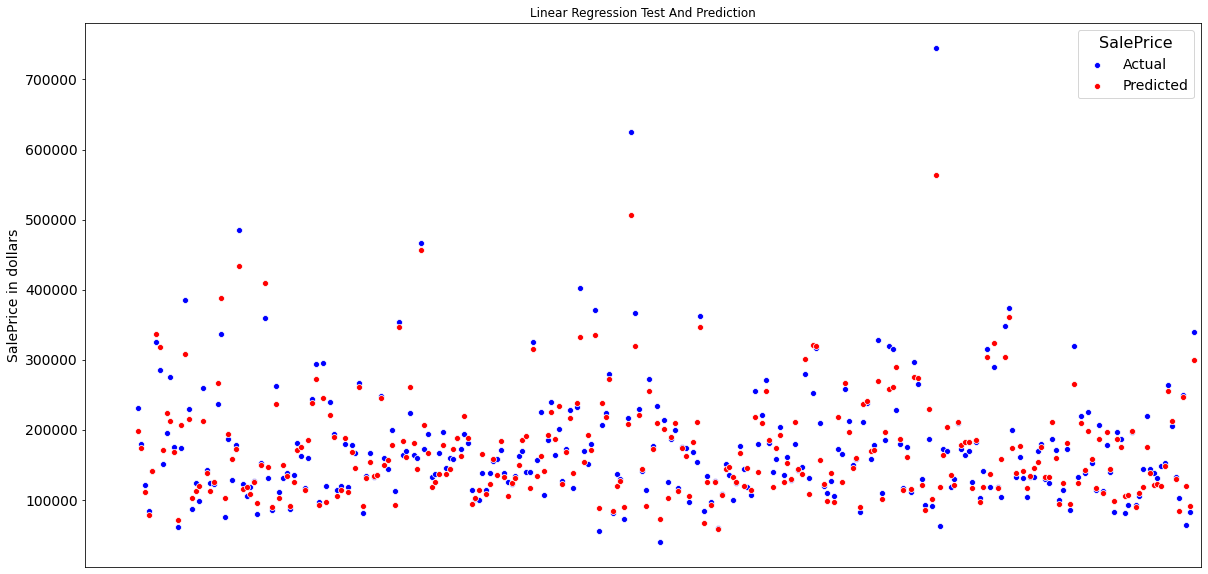

In [244]:
viz_df = pd.DataFrame()
viz_df['x'] = np.arange(0,len(x_test))
viz_df['actual_TV'] = y_test.tolist()
viz_df['pred_TV'] = y_pred_test_orig
plt.figure(figsize=(20,10))
sns.scatterplot('x' ,'actual_TV',data=viz_df,color='blue',label="Actual")
sns.scatterplot('x','pred_TV',data=viz_df,color='red',label="Predicted")
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(right = len(x_test)+1)
plt.ylabel('SalePrice in dollars',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=14,title= 'SalePrice',title_fontsize=16)
plt.title('Linear Regression Test And Prediction')
plt.savefig('LinearReg.jpeg',bbox_inches='tight')
plt.show()

<a id = 'MELR'></a>
### 8.6: Model Evaluation

In [245]:
from sklearn import metrics

##### 8.6.1: Model Evaluation with transformed data

###### 8.6.1.1: RMSE

In [246]:
RMSE_train_linreg = np.sqrt(metrics.mean_squared_error(y_train_log,y_pred_train))
RMSE_test_linreg = np.sqrt(metrics.mean_squared_error(y_test_log,y_pred_test))

In [247]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train_linreg.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test_linreg.round(2)))

The irreducable Error, for train data Obtained through this model is 0.14
The irreducable Error, for test data Obtained through this model is 0.14


###### 8.6.1.2: R<sup>2</sup>

In [248]:
r2_sq_train_linreg = metrics.r2_score(y_train_log,y_pred_train)
r2_sq_test_linreg = metrics.r2_score(y_test_log,y_pred_test)

In [249]:
print("{}% of the variance in error of train data is covered in this model".format((r2_sq_train_linreg*100).round(2)))
print("{}% of the variance in error of test data is covered in this model".format((r2_sq_test_linreg*100).round(2)))

88.1% of the variance in error of train data is covered in this model
88.83% of the variance in error of test data is covered in this model


###### 8.6.1.3: Adjusted R<sup>2</sup>

In [250]:
adjusted_r_squared_train_linreg = 1 - (1-r2_sq_train_linreg)*(len(y_pred_train)-1)/(len(y_pred_train)-x_scaled_train.shape[1]-1)
adjusted_r_squared_test_linreg = 1 - (1-r2_sq_test_linreg)*(len(y_pred_test)-1)/(len(y_pred_test)-x_scaled_test.shape[1]-1)

In [251]:
print("{}% is the adjusted r-squared for train data for this model".format((adjusted_r_squared_train_linreg*100).round(2)))
print("{}% is the adjusted r-squared for test data for this model".format((adjusted_r_squared_test_linreg*100).round(2)))

87.61% is the adjusted r-squared for train data for this model
86.74% is the adjusted r-squared for test data for this model


##### 8.7.2: Model Evaluation with original data

###### 8.7.2.1: RMSE

In [252]:
RMSE_train_orig_linreg = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train_orig))
RMSE_test_orig_linreg = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_orig))

In [253]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train_orig_linreg.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test_orig_linreg.round(2)))

The irreducable Error, for train data Obtained through this model is 31320.91
The irreducable Error, for test data Obtained through this model is 25910.84


###### 8.7.2.2: R<sup>2</sup>

In [254]:
r2_sq_train_orig_linreg = metrics.r2_score(y_train,y_pred_train_orig)
r2_sq_test_orig_linreg = metrics.r2_score(y_test,y_pred_test_orig)

In [255]:
print("{}% of the variance in error of train data is covered in this model".format((r2_sq_train_orig_linreg*100).round(2)))
print("{}% of the variance in error of test data is covered in this model".format((r2_sq_test_orig_linreg*100).round(2)))

83.9% of the variance in error of train data is covered in this model
90.59% of the variance in error of test data is covered in this model


###### 8.7.2.3: Adjusted R<sup>2</sup>

In [256]:
adjusted_r_squared_train_orig_linreg = 1 - (1-r2_sq_train_orig_linreg)*(len(y_pred_train_orig)-1)/(len(y_pred_train_orig)-x_scaled_train.shape[1]-1)
adjusted_r_squared_test_orig_linreg = 1 - (1-r2_sq_test_orig_linreg)*(len(y_pred_test_orig)-1)/(len(y_pred_test_orig)-x_scaled_test.shape[1]-1)

In [257]:
print("{}% is the adjusted r-squared for train data for this model".format((adjusted_r_squared_train_orig_linreg*100).round(2)))
print("{}% is the adjusted r-squared for test data for this model".format((adjusted_r_squared_test_orig_linreg*100).round(2)))

83.24% is the adjusted r-squared for train data for this model
88.82% is the adjusted r-squared for test data for this model


<a id='rt'></a>
## 9: Regression Tree

In [258]:
x_train_rt = x_train
x_test_rt = x_test
y_train_rt = y_train
y_test_rt = y_test

<a id = 'rtScaling'></a>
### 9.1: Scaling the data

##### 9.1.1: Making the scalars

In [259]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler().fit(x_train_rt)

##### 9.1.2: Scaling the data

In [260]:
x_scaled_train =feature_scaler.transform(x_train_rt)
x_scaled_test = feature_scaler.transform(x_test_rt)

<a id='ObRTM'></a>
### 9.2: Obtaining the regression tree model

In [261]:
from sklearn import tree
rt_reg = tree.DecisionTreeRegressor(criterion='mse')
rt_reg.fit(x_scaled_train,y_train_rt)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

<a id='AppModRT'></a>
### 9.3: Applying the Model on test data

In [262]:
y_pred_train = rt_reg.predict(x_scaled_train)
y_pred_test = rt_reg.predict(x_scaled_test)

<a id='VisRT'></a>
### 9.4: Visualization

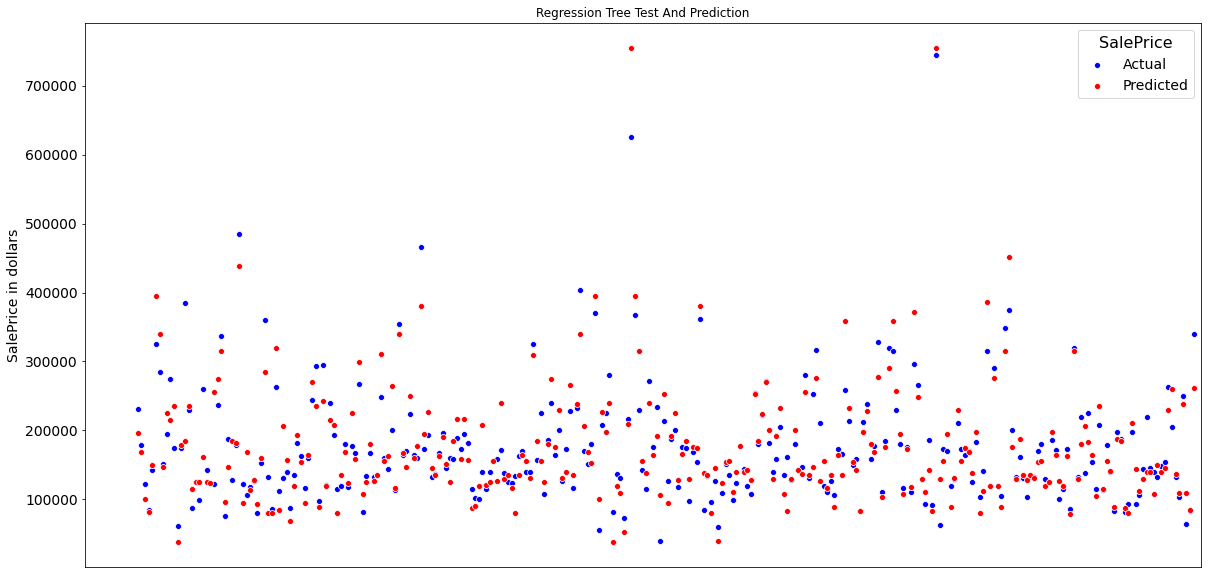

In [263]:
viz_df = pd.DataFrame()
viz_df['x'] = np.arange(0,len(x_test_rt))
viz_df['actual_TV'] = y_test_rt.tolist()
viz_df['pred_TV'] = y_pred_test
plt.figure(figsize=(20,10))
sns.scatterplot('x' ,'actual_TV',data=viz_df,color='blue',label="Actual")
sns.scatterplot('x','pred_TV',data=viz_df,color='red',label="Predicted")
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(right = len(x_test)+1)
plt.ylabel('SalePrice in dollars',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=14,title= 'SalePrice',title_fontsize =16)
plt.title('Regression Tree Test And Prediction')
plt.savefig('RegressionTree.jpeg',bbox_inches='tight')
plt.show()

<a id ='MERT'></a>
### 9.5: Model Evaluation

In [264]:
from sklearn import metrics

#### 9.5.1: RMSE

In [265]:
RMSE_train_rt = np.sqrt(metrics.mean_squared_error(y_train_rt,y_pred_train))
RMSE_test_rt = np.sqrt(metrics.mean_squared_error(y_test_rt,y_pred_test))

In [266]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train_rt.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test_rt.round(2)))

The irreducable Error, for train data Obtained through this model is 155.18
The irreducable Error, for test data Obtained through this model is 35329.27


#### 9.5.2: R<sup>2</sup>

In [267]:
r2_sq_train_rt = metrics.r2_score(y_train_rt,y_pred_train)
r2_sq_test_rt = metrics.r2_score(y_test_rt,y_pred_test)

In [268]:
print("{}% of the variance in error of train data is covered in this model".format((r2_sq_train_rt*100).round(2)))
print("{}% of the variance in error of test data is covered in this model".format((r2_sq_test_rt*100).round(2)))

100.0% of the variance in error of train data is covered in this model
82.5% of the variance in error of test data is covered in this model


###### 9.5.3: Adjusted R<sup>2</sup>

In [269]:
adjusted_r_squared_train_rt = 1 - (1-r2_sq_train_rt)*(len(y_pred_train)-1)/(len(y_pred_train)-x_scaled_train.shape[1]-1)
adjusted_r_squared_test_rt = 1 - (1-r2_sq_test_rt)*(len(y_pred_test)-1)/(len(y_pred_test)-x_scaled_test.shape[1]-1)

In [270]:
print("{}% is the adjusted r-squared for train data for this model".format((adjusted_r_squared_train_rt*100).round(2)))
print("{}% is the adjusted r-squared for test data for this model".format((adjusted_r_squared_test_rt*100).round(2)))

100.0% is the adjusted r-squared for train data for this model
76.31% is the adjusted r-squared for test data for this model


Since the model has very good R<sup>2</sup> and adjusted R<sup>2</sup> score for train data but it fails to obtain similar result for the test data, we can conclude that the model created is overfitting the data. Hence we proceed with GridSearchCV to obtain best model instance.

<a id='RTGSCV'></a>
### 9.6: GridSearchCV

<a id='ObRTGSCV'></a>
#### 9.6.1: Obtaining and fitting the model For GridSearchCV along with range of params

In [271]:
from sklearn.model_selection import GridSearchCV
tree_para = [{'max_depth':range(1,16),'min_samples_split':np.arange(2,5)}]
grid_search = GridSearchCV(rt_reg,tree_para,n_jobs=-1,cv =10)
grid_search.fit(x_scaled_train,y_train_rt)

/Users/Aashish/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': range(1, 16),
                          'min_samples_split': array([2, 3, 4])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

<a id='AppModRTGSCV'></a>
#### 9.6.2: Applying the Model on test data

In [272]:
y_pred_train = grid_search.predict(x_scaled_train)
y_pred_test = grid_search.predict(x_scaled_test)

<a id='VisRTGSCV'></a>
#### 9.6.3: Visualization

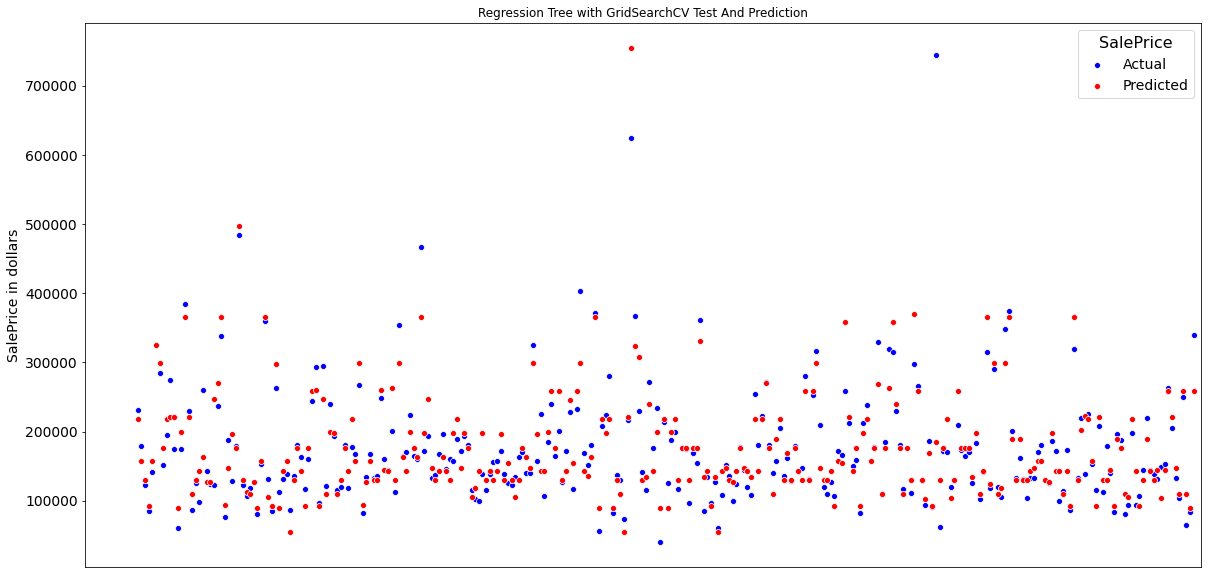

In [273]:
viz_df = pd.DataFrame()
viz_df['x'] = np.arange(0,len(x_test_rt))
viz_df['actual_TV'] = y_test_rt.tolist()
viz_df['pred_TV'] = y_pred_test
plt.figure(figsize=(20,10))
sns.scatterplot('x' ,'actual_TV',data=viz_df,color='blue',label="Actual")
sns.scatterplot('x','pred_TV',data=viz_df,color='red',label="Predicted")
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(right = len(x_test)+1)
plt.ylabel('SalePrice in dollars',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=14,title= 'SalePrice',title_fontsize=16)
plt.title('Regression Tree with GridSearchCV Test And Prediction')
plt.savefig('RegressionTreeCV.jpeg',bbox_inches='tight')
plt.show()

<a id='MERTGSCV'></a>
#### 9.6.4: Model Evaluation

In [274]:
from sklearn import metrics

##### 9.6.4.1: RMSE

In [275]:
RMSE_train_cv = np.sqrt(metrics.mean_squared_error(y_train_rt,y_pred_train))
RMSE_test_cv = np.sqrt(metrics.mean_squared_error(y_test_rt,y_pred_test))

In [276]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train_cv.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test_cv.round(2)))

The irreducable Error, for train data Obtained through this model is 19762.77
The irreducable Error, for test data Obtained through this model is 44643.15


##### 9.6.4.2: R<sup>2</sup>

In [277]:
r2_sq_train_cv = metrics.r2_score(y_train_rt,y_pred_train)
r2_sq_test_cv = metrics.r2_score(y_test_rt,y_pred_test)

In [278]:
print("{}% of the variance in error of train data is covered in this model".format((r2_sq_train_cv*100).round(2)))
print("{}% of the variance in error of test data is covered in this model".format((r2_sq_test_cv*100).round(2)))

93.59% of the variance in error of train data is covered in this model
72.06% of the variance in error of test data is covered in this model


##### 9.6.4.3: Adjusted R<sup>2</sup>

In [279]:
adjusted_r_squared_train_cv = 1 - (1-r2_sq_train_cv)*(len(y_pred_train)-1)/(len(y_pred_train)-x_scaled_train.shape[1]-1)
adjusted_r_squared_test_cv = 1 - (1-r2_sq_test_cv)*(len(y_pred_test)-1)/(len(y_pred_test)-x_scaled_test.shape[1]-1)

In [280]:
print("{}% is the adjusted r-squared for train data for this model".format((adjusted_r_squared_train_cv*100).round(2)))
print("{}% is the adjusted r-squared for test data for this model".format((adjusted_r_squared_test_cv*100).round(2)))

93.14% is the adjusted r-squared for train data for this model
62.18% is the adjusted r-squared for test data for this model


In [281]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 3}

<a id='rfr'></a>
## 10: Random Forest Regressor

In [282]:
x_train_rfr = x_train
x_test_rfr = x_test
y_train_rfr = y_train
y_test_rfr = y_test

<a id = 'rfrScaling'></a>
### 10.1: Scaling the data

#### 10.1.1: Making the scalars

In [283]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler().fit(x_train_rfr)

#### 10.1.2: Scaling the data

In [284]:
x_scaled_train = feature_scaler.transform(x_train_rfr)
x_scaled_test = feature_scaler.transform(x_test_rfr)

<a id = 'ObRFRM'></a>
### 10.2: Obtaining the Random Forrest Regressor Model

In [285]:
from sklearn.ensemble import RandomForestRegressor
rfr_reg = RandomForestRegressor()
rfr_reg.fit(x_scaled_train,y_train_rfr)

/Users/Aashish/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

<a id ='AppModRFRM'></a>
### 10.3: Applying the Model on test data

In [286]:
y_pred_train = rfr_reg.predict(x_scaled_train)
y_pred_test = rfr_reg.predict(x_scaled_test)

<a id ='VisRFRM'></a>
### 10.4: Visualization

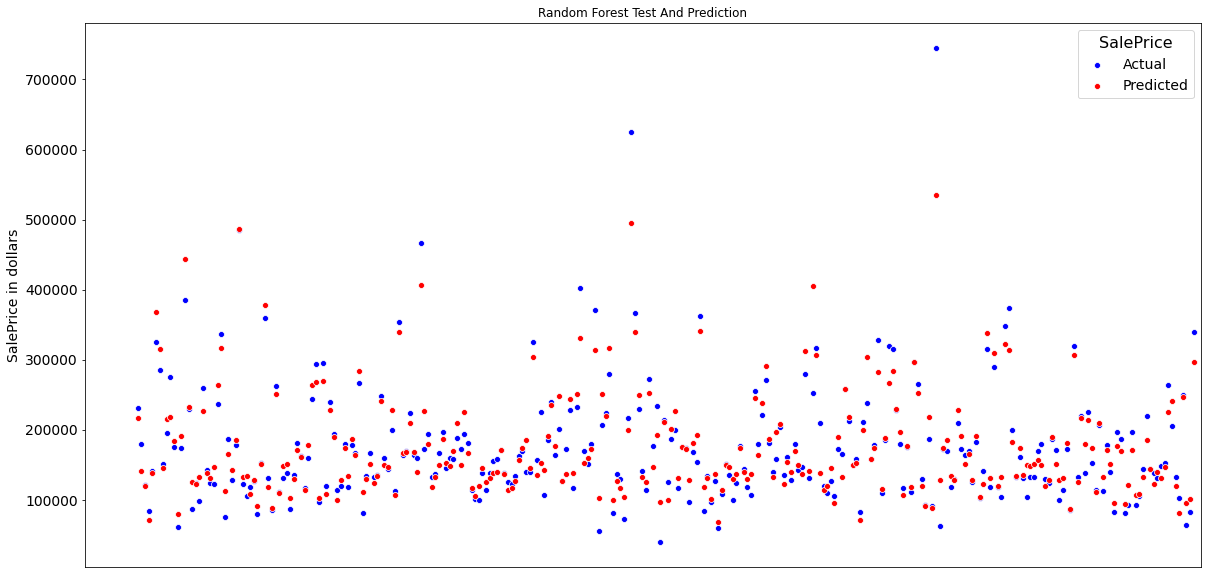

In [287]:
viz_df = pd.DataFrame()
viz_df['x'] = np.arange(0,len(x_test_rfr))
viz_df['actual_TV'] = y_test_rfr.tolist()
viz_df['pred_TV'] = y_pred_test
plt.figure(figsize=(20,10))
sns.scatterplot('x' ,'actual_TV',data=viz_df,color='blue',label="Actual")
sns.scatterplot('x','pred_TV',data=viz_df,color='red',label="Predicted")
plt.xlabel('')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(right = len(x_test)+1)
plt.ylabel('SalePrice in dollars',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=14,title= 'SalePrice',title_fontsize=16)
plt.title('Random Forest Test And Prediction')
plt.savefig('RandomForest.jpeg',bbox_inches='tight')
plt.show()

<a id='MERFRM'></a>
### 10.5: Model Evaluation

In [288]:
from sklearn import metrics

#### 10.5.1: RMSE

In [289]:
RMSE_train_rfr = np.sqrt(metrics.mean_squared_error(y_train_rfr,y_pred_train))
RMSE_test_rfr = np.sqrt(metrics.mean_squared_error(y_test_rfr,y_pred_test))

In [290]:
print("The irreducable Error, for train data Obtained through this model is {}".format(RMSE_train_rfr.round(2)))
print("The irreducable Error, for test data Obtained through this model is {}".format(RMSE_test_rfr.round(2)))

The irreducable Error, for train data Obtained through this model is 12906.0
The irreducable Error, for test data Obtained through this model is 27922.94


#### 10.5.2: R<sup>2</sup>

In [291]:
r2_sq_train_rfr = metrics.r2_score(y_train_rfr,y_pred_train)
r2_sq_test_rfr = metrics.r2_score(y_test_rfr,y_pred_test)

In [292]:
print("{}% of the variance in error of train data is covered in this model".format((r2_sq_train_rfr*100).round(2)))
print("{}% of the variance in error of test data is covered in this model".format((r2_sq_test_rfr*100).round(2)))

97.27% of the variance in error of train data is covered in this model
89.07% of the variance in error of test data is covered in this model


##### 10.5.3: Adjusted R<sup>2</sup>

In [293]:
adjusted_r_squared_train_rfr = 1 - (1-r2_sq_train_rfr)*(len(y_pred_train)-1)/(len(y_pred_train)-x_scaled_train.shape[1]-1)
adjusted_r_squared_test_rfr = 1 - (1-r2_sq_test_rfr)*(len(y_pred_test)-1)/(len(y_pred_test)-x_scaled_test.shape[1]-1)

In [294]:
print("{}% is the adjusted r-squared for train data for this model".format((adjusted_r_squared_train_rfr*100).round(2)))
print("{}% is the adjusted r-squared for test data for this model".format((adjusted_r_squared_test_rfr*100).round(2)))

97.08% is the adjusted r-squared for train data for this model
85.2% is the adjusted r-squared for test data for this model


<a id='compare'></a>
## 11: Comparision of Models

<a id='compare_train'></a>
### 11.1: Comparision of Models with train data

In [295]:
compare_df_train = pd.DataFrame()
compare_df_train['Models'] = ['LRWT', 'LRWOT', 'RT', 'RTGSCV', 'RFR']
compare_df_train['RMSE'] = [RMSE_train_linreg, RMSE_train_orig_linreg, RMSE_train_rt, RMSE_train_cv, RMSE_train_rfr]
compare_df_train['R2'] = [r2_sq_train_linreg, r2_sq_train_orig_linreg, r2_sq_train_rt, r2_sq_train_cv, r2_sq_train_rfr]
compare_df_train['AdjR2'] = [adjusted_r_squared_train_linreg, adjusted_r_squared_train_orig_linreg, adjusted_r_squared_train_rt, adjusted_r_squared_train_cv, adjusted_r_squared_train_rfr]
compare_df_train

,Models,RMSE,R2,AdjR2
0,LRWT,0.136017,0.880998,0.876115
1,LRWOT,31320.909280,0.838975,0.832367
2,RT,155.176104,0.999996,0.999996
3,RTGSCV,19762.770730,0.935891,0.931425
4,RFR,12906.001874,0.972659,0.970755


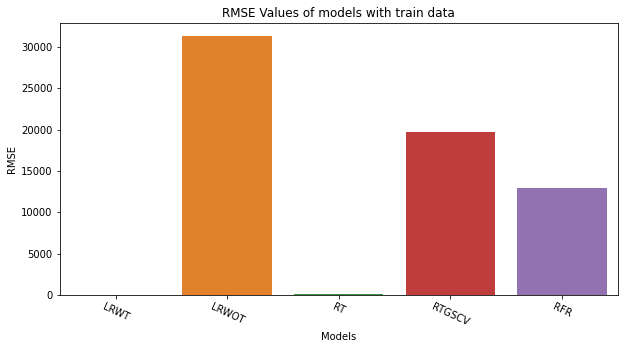

In [296]:
plt.figure(figsize=(10,5))
sns.barplot(x='Models', y='RMSE', data=compare_df_train)
plt.xticks(rotation = -25)
plt.title('RMSE Values of models with train data')
plt.savefig('RMSE_TrainCompare.jpeg',bbox_inches='tight')
plt.show()

<Figure size 1440x360 with 0 Axes>

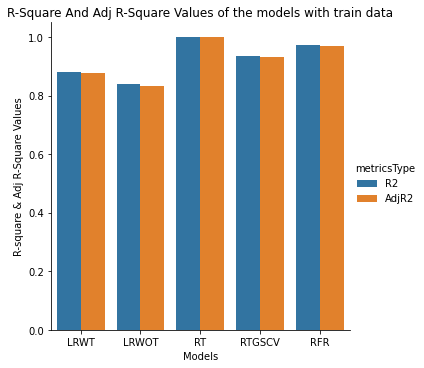

In [297]:
compare_df_train = pd.melt(compare_df_train[['Models','R2','AdjR2']],id_vars='Models',var_name="metricsType", value_name="metricsValue")
plt.figure(figsize=(20,5))
sns.catplot(data= compare_df_train, x='Models',y='metricsValue',hue='metricsType',kind='bar')
plt.ylabel('R-square & Adj R-Square Values')
plt.title('R-Square And Adj R-Square Values of the models with train data')
plt.savefig('R2AndAdjR2_TrainCompare.jpeg',bbox_inches='tight')
plt.show()

<a id='compare_test'></a>
### 11.2: Comparision of Models with test data

In [298]:
compare_df_test = pd.DataFrame()
compare_df_test['Models'] = ['LRWT', 'LRWOT', 'RT', 'RTGSCV', 'RFR']
compare_df_test['RMSE'] = [RMSE_test_linreg, RMSE_test_orig_linreg, RMSE_test_rt, RMSE_test_cv, RMSE_test_rfr]
compare_df_test['R2'] = [r2_sq_test_linreg, r2_sq_test_orig_linreg, r2_sq_test_rt, r2_sq_test_cv, r2_sq_test_rfr]
compare_df_test['AdjR2'] = [adjusted_r_squared_test_linreg, adjusted_r_squared_test_orig_linreg, adjusted_r_squared_test_rt, adjusted_r_squared_test_cv, adjusted_r_squared_test_rfr]
compare_df_test

,Models,RMSE,R2,AdjR2
0,LRWT,0.139213,0.888333,0.867367
1,LRWOT,25910.838552,0.905864,0.888190
2,RT,35329.265653,0.824991,0.763127
3,RTGSCV,44643.148239,0.720552,0.621770
4,RFR,27922.940124,0.890676,0.852032


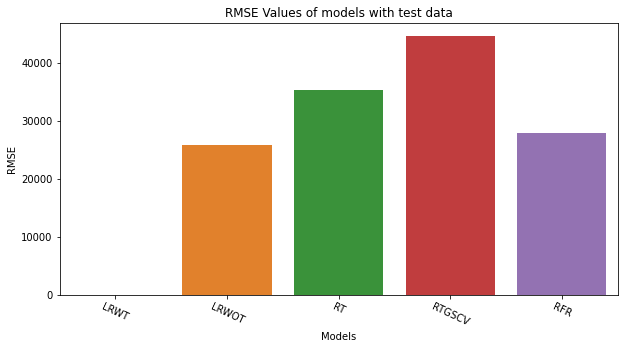

In [299]:
plt.figure(figsize=(10,5))
sns.barplot(x='Models', y='RMSE', data=compare_df_test)
plt.xticks(rotation = -25)
plt.title('RMSE Values of models with test data')
plt.savefig('RMSE_TestCompare.jpeg',bbox_inches='tight')
plt.show()

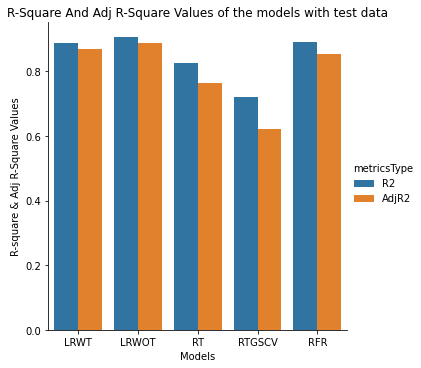

In [300]:
compare_df_test = pd.melt(compare_df_test[['Models','R2','AdjR2']],id_vars='Models',var_name="metricsType", value_name="metricsValue")
sns.catplot(data= compare_df_test, x='Models',y='metricsValue',hue='metricsType',kind='bar')
plt.ylabel('R-square & Adj R-Square Values')
plt.title('R-Square And Adj R-Square Values of the models with test data')
plt.savefig('R2AndAdjR2_TestCompare.jpeg',bbox_inches='tight')
plt.show()